In [ ]:
!pip install shap
!pip install lime

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from pylab import rcParams
import seaborn as sb
from scipy.stats.stats import kendalltau
import io
from scipy.stats import kendalltau
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

<ipython-input-85-0242e9364b38>:8: DeprecationWarning: Please use `kendalltau` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import kendalltau


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving all_features_march2023.csv to all_features_march2023 (4).csv


In [ ]:
df = pd.read_csv(io.BytesIO(uploaded['all_features_march2023 (4).csv']))

# Original data without clearning

In [ ]:
# initial data count is 313
df.keys()
df.describe()

num_citations  author_count      u_rank  self_citations  \
count     313.000000    313.000000  313.000000      313.000000   
mean      256.894569      3.888179    1.655300        0.083017   
std       569.204600      4.492546    0.565777        0.084194   
min         0.000000      0.000000    0.069307        0.000000   
25%        41.000000      2.000000    0.950495        0.000000   
50%       107.000000      3.000000    2.000000        0.066667   
75%       257.000000      4.000000    2.000000        0.141026   
max      5358.000000     33.000000    2.000000        0.444444   

       upstream_influential_methodology_count  citationVelocity  \
count                              313.000000        313.000000   
mean                                 1.051118         16.495208   
std                                  1.912494         36.663938   
min                                  0.000000         -1.000000   
25%                                  0.000000          0.000000   
50%                                  0.000000          6.000000   
75%                                  2.000000         18.000000   
max                                 17.000000        378.000000   

       influentialCitationCount  references_count  openaccessflag  \
count                313.000000        313.000000      313.000000   
mean                  22.000000         38.118211        0.549521   
std                   37.051074         27.233595        0.498338   
min                   -1.000000          0.000000        0.000000   
25%                    2.000000         19.000000        0.000000   
50%                    9.000000         33.000000        1.000000   
75%                   26.000000         53.000000        1.000000   
max                  321.000000        197.000000        1.000000   

       normalized_citations  ...  Venue_Percent_Cited  Venue_CiteScore  \
count            313.000000  ...           313.000000       313.000000   
mean              16.980647  ...            74.841730        11.807627   
std               31.336136  ...            14.639757        14.347599   
min                0.000000  ...            39.000000         0.900000   
25%                3.055556  ...            56.000000         3.242882   
50%                7.285714  ...            83.000000        11.300000   
75%               18.857143  ...            85.000000        11.700000   
max              276.611111  ...            98.000000        70.200000   

       Venue_SNIP   Venue_SJR  Venue_subject_code           y      score1  \
count  313.000000  313.000000          313.000000  313.000000  313.000000   
mean     3.254701    4.079024            1.065552    0.405751    2.380192   
std      2.517968    5.316475            0.727960    0.491823    5.474228   
min      0.532000    0.214000           -1.000000    0.000000    0.000000   
25%      0.983931    0.667010            1.000000    0.000000    0.000000   
50%      3.537000    3.020000            1.000000    0.000000    0.000000   
75%      3.813000    3.697000            1.000000    1.000000    3.000000   
max     12.035000   31.348000            4.000000    1.000000   53.000000   

           gender       table      figure  
count  313.000000  313.000000  313.000000  
mean     0.164747    1.741214    2.392971  
std      0.534176    2.564575    3.062733  
min     -1.000000   -1.000000   -1.000000  
25%      0.000000    0.000000    0.000000  
50%      0.000000    1.000000    1.000000  
75%      0.811278    3.000000    4.000000  
max      1.000000    9.000000   14.000000  

[8 rows x 48 columns]

# Data cleaning

In [ ]:
# remove missing values
pct_missing = round((df.isnull().sum())/(
    df.isnull().count())*100, 1)
pct_missing.sort_values(ascending=False).head()

Venue_subject    20.8
title             2.9
age               0.0
real_p_sign       0.0
p_val_range       0.0
dtype: float64

In [ ]:
# View the observations with missing (-1) values
# real_p_sign has the most missing values,
# so I will remove this feature from the dataset
(df==-1).sum()

doi                                        0
title                                      0
num_citations                              0
author_count                               0
u_rank                                     0
self_citations                             0
upstream_influential_methodology_count     0
citationVelocity                          26
influentialCitationCount                  26
references_count                           0
openaccessflag                             0
normalized_citations                       0
influentialReferencesCount                30
reference_background                      30
reference_result                          30
reference_methodology                     30
citations_background                      26
citations_result                          26
citations_methodology                     26
citations_next                             0
coCite2                                    0
coCite3                                    0
reading_sc

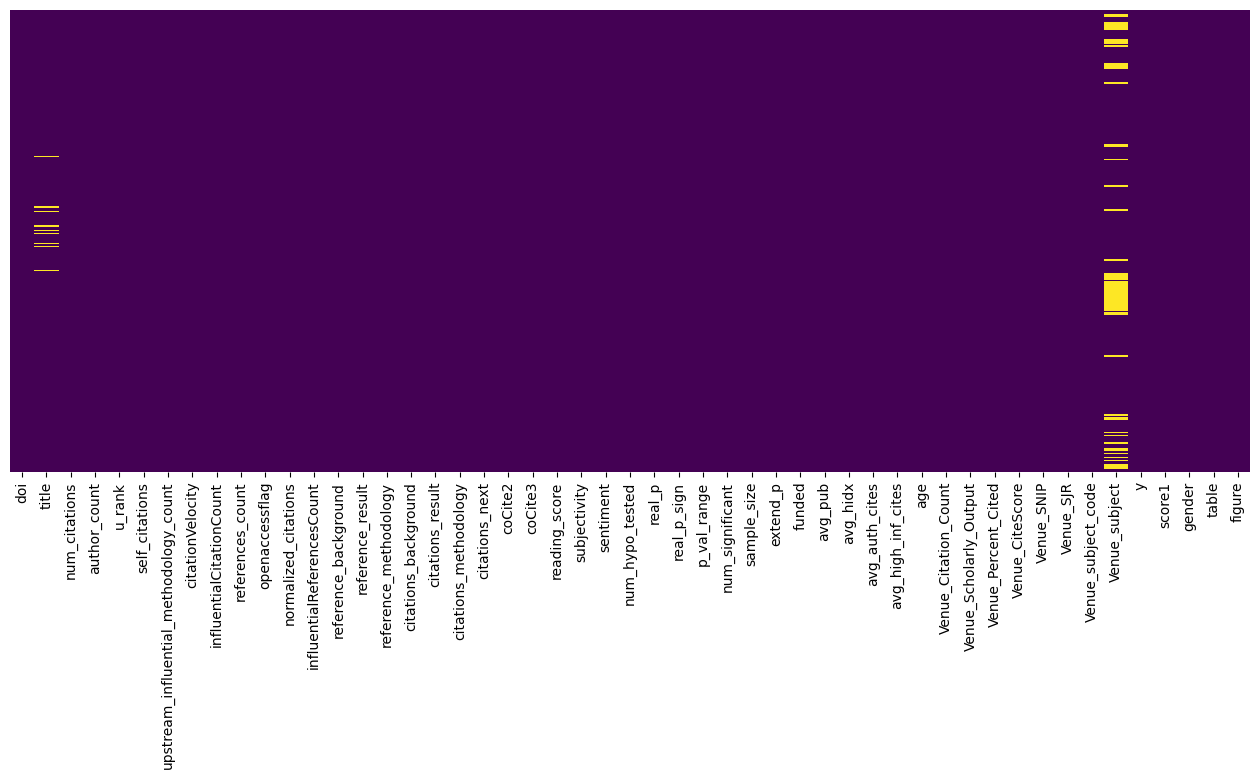

In [ ]:
plt.figure(figsize = (16,6))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis');

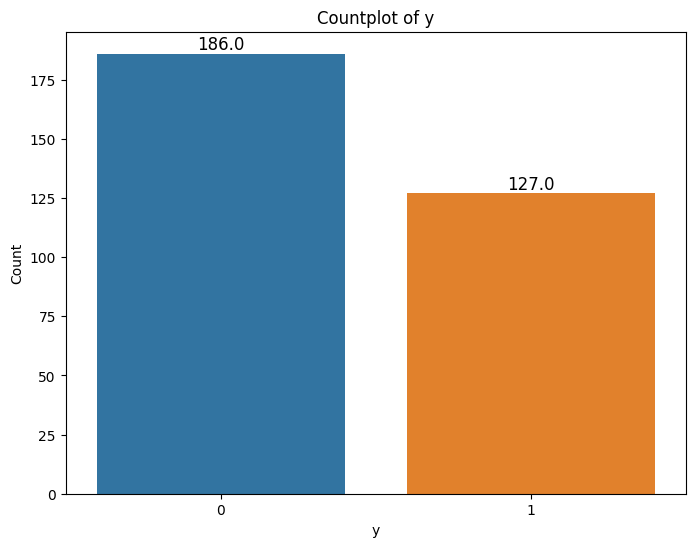

In [ ]:
# Initial classes without data clearning
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
ax = sns.countplot(x='y', data=df)

# Add count number on each column
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=12)

plt.xlabel('y')
plt.ylabel('Count')
plt.title('Countplot of y')

plt.show()


In [ ]:
# remove and delete the missing values
n_df = df.drop('real_p_sign', axis = 1)
nn_df = n_df[(df.citationVelocity != -1) & (df.influentialCitationCount != -1) & (df.Venue_subject_code  != -1) & (df.influentialReferencesCount != -1) &
           (df.reference_background != -1) & (df.reference_result != -1) & (df.reference_methodology != -1) & (df.subjectivity != -1) & (df.sentiment != -1)]

In [ ]:
# the final dataset I have used or the analysis
nn_df.describe()

num_citations  author_count      u_rank  self_citations  \
count     256.000000    256.000000  256.000000      256.000000   
mean      214.140625      4.078125    1.653427        0.091544   
std       408.476245      4.475834    0.575816        0.085143   
min         1.000000      0.000000    0.069307        0.000000   
25%        44.750000      2.000000    0.950495        0.000000   
50%       103.500000      3.000000    2.000000        0.076923   
75%       243.250000      4.000000    2.000000        0.145219   
max      4979.000000     33.000000    2.000000        0.444444   

       upstream_influential_methodology_count  citationVelocity  \
count                              256.000000        256.000000   
mean                                 1.257812         15.113281   
std                                  2.039785         35.198135   
min                                  0.000000          0.000000   
25%                                  0.000000          0.000000   
50%                                  0.000000          7.000000   
75%                                  2.000000         17.250000   
max                                 17.000000        378.000000   

       influentialCitationCount  references_count  openaccessflag  \
count                256.000000        256.000000      256.000000   
mean                  22.824219         42.050781        0.632812   
std                   37.698967         27.193738        0.482982   
min                    0.000000          2.000000        0.000000   
25%                    4.000000         23.000000        0.000000   
50%                   11.000000         37.000000        1.000000   
75%                   26.000000         59.000000        1.000000   
max                  321.000000        197.000000        1.000000   

       normalized_citations  ...  Venue_Percent_Cited  Venue_CiteScore  \
count            256.000000  ...           256.000000       256.000000   
mean              13.971309  ...            75.073775         8.354302   
std               23.806670  ...            14.635721         4.952568   
min                0.000000  ...            39.000000         0.900000   
25%                3.241071  ...            56.000000         3.242882   
50%                7.142857  ...            83.000000        10.700000   
75%               16.732143  ...            86.000000        11.700000   
max              276.611111  ...            98.000000        41.800000   

       Venue_SNIP   Venue_SJR  Venue_subject_code           y      score1  \
count  256.000000  256.000000          256.000000  256.000000  256.000000   
mean     2.814721    3.147338            1.191849    0.390625    2.539062   
std      1.765495    4.074357            0.412033    0.488846    5.755682   
min      0.532000    0.214000            1.000000    0.000000    0.000000   
25%      0.983931    0.667010            1.000000    0.000000    0.000000   
50%      3.537000    3.020000            1.000000    0.000000    0.500000   
75%      3.813000    3.697000            1.000000    1.000000    3.000000   
max     12.035000   31.348000            4.000000    1.000000   53.000000   

           gender       table      figure  
count  256.000000  256.000000  256.000000  
mean     0.278398    2.089844    2.535156  
std      0.424688    2.572047    2.869504  
min      0.000000    0.000000    0.000000  
25%      0.000000    0.000000    0.000000  
50%      0.000000    1.000000    2.000000  
75%      0.811278    3.000000    4.000000  
max      1.000000    9.000000   14.000000  

[8 rows x 47 columns]

In [ ]:
from sklearn.feature_selection import mutual_info_regression

target_column = 'y'

# Separate the target variable and independent features
X = nn_df.drop(['y', 'doi', 'title', 'Venue_subject'], axis=1)
y = nn_df['y']

# Compute mutual information
mutual_info_scores = mutual_info_regression(X, y, random_state=42)

# Create a DataFrame to store the mutual information scores
mutual_info_df = pd.DataFrame({'Feature': X.columns, 'Mutual Information': mutual_info_scores})

# Sort the DataFrame by mutual information scores in descending order
mutual_info_df = mutual_info_df.sort_values(by='Mutual Information', ascending=False)

# Print the results
print(mutual_info_df)

                                   Feature  Mutual Information
33                      avg_high_inf_cites            0.085658
23                         num_hypo_tested            0.074086
36                  Venue_Scholarly_Output            0.072664
13                   reference_methodology            0.069310
39                              Venue_SNIP            0.069177
25                             p_val_range            0.067905
2                                   u_rank            0.067156
5                         citationVelocity            0.050876
24                                  real_p            0.050379
41                      Venue_subject_code            0.048142
14                    citations_background            0.044623
17                          citations_next            0.039675
20                           reading_score            0.036429
3                           self_citations            0.029260
44                                   table            0

In [ ]:
(nn_df == -1).sum()

doi                                       0
title                                     0
num_citations                             0
author_count                              0
u_rank                                    0
self_citations                            0
upstream_influential_methodology_count    0
citationVelocity                          0
influentialCitationCount                  0
references_count                          0
openaccessflag                            0
normalized_citations                      0
influentialReferencesCount                0
reference_background                      0
reference_result                          0
reference_methodology                     0
citations_background                      0
citations_result                          0
citations_methodology                     0
citations_next                            0
coCite2                                   0
coCite3                                   0
reading_score                   

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


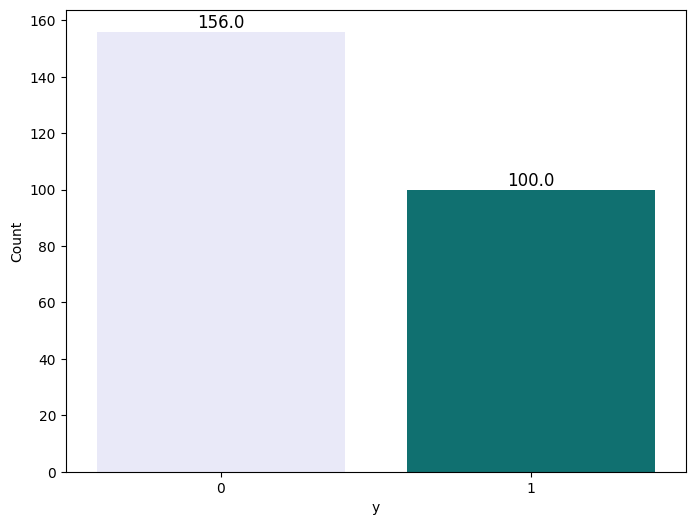

In [ ]:
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Mount Google Drive
drive.mount('/content/drive')

# Define a custom color palette
colors = ['#E6E6FA', '#008080']  # lavender and teal
# colors = ['#F5F5DC', '#808000']  # beige and olive

plt.figure(figsize=(8, 6))
ax = sns.countplot(x='y', data=nn_df, palette=colors)

# Add count number on each column
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=12)

plt.xlabel('y')
plt.ylabel('Count')
#plt.title('Countplot of y')

# Save the figure to Google Drive
directory = '/content/drive/My Drive/Colab Notebooks/paper_reproducability'
filename = 'Countplot.png'
save_path = os.path.join(directory, filename)
plt.savefig(save_path, dpi=300)

plt.show()


## Analysis of model performance

### Model performance metrics of original data

In [ ]:
# Performance metrics of orignial data wihtout any modification
#!pip install imbalanced-learn
#from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Separate the target variable and independent features
X = nn_df.drop(['y', 'doi', 'title', 'Venue_subject'], axis=1)
y = nn_df['y']

# Split the data into train and test sets
# approximately the 80% of the data will be about 204 and
# the 20% is used to compare with the test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the training data
y_pred_train = model.predict(X_train)

# Calculate accuracy, precision, recall, and F1 score on the training data
accuracy_train = accuracy_score(y_train, y_pred_train)
precision_train = precision_score(y_train, y_pred_train)
recall_train = recall_score(y_train, y_pred_train)
f1_train = f1_score(y_train, y_pred_train)

# Print the metrics
print("Accuracy on training data:", accuracy_train)
print("Precision on training data:", precision_train)
print("Recall on training data:", recall_train)
print("F1 score on training data:", f1_train)


##### Test data
#Make predictions on the test data
y_pred_test = model.predict(X_test)

# Calculate accuracy, precision, recall, and F1 score on the test data
accuracy_test = accuracy_score(y_test, y_pred_test)
precision_train = precision_score(y_test, y_pred_test)
recall_train = recall_score(y_test, y_pred_test)
f1_train = f1_score(y_test, y_pred_test)

# Print the metrics
print("Accuracy on test data:", accuracy_train)
print("Precision on test data:", precision_train)
print("Recall on test data:", recall_train)
print("F1 score on test data:", f1_train)





Accuracy on training data: 0.7156862745098039
Precision on training data: 0.8571428571428571
Recall on training data: 0.2465753424657534
F1 score on training data: 0.3829787234042553
Accuracy on test data: 0.7156862745098039
Precision on test data: 0.7142857142857143
Recall on test data: 0.18518518518518517
F1 score on test data: 0.2941176470588235


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.svm import SVC

# Create an SVM classifier (you can adjust parameters like kernel, C, etc.)
model = SVC(kernel='linear', C=1.0, random_state=42)

# Fit the SVM model to the training data
model.fit(X_train, y_train)

# Make predictions on the training data
y_pred_train = model.predict(X_train)

# Calculate accuracy, precision, recall, and F1 score on the training data
accuracy_train = accuracy_score(y_train, y_pred_train)
precision_train = precision_score(y_train, y_pred_train)
recall_train = recall_score(y_train, y_pred_train)
f1_train = f1_score(y_train, y_pred_train)

# Print the metrics
print("Accuracy on training data:", accuracy_train)
print("Precision on training data:", precision_train)
print("Recall on training data:", recall_train)
print("F1 score on training data:", f1_train)

Accuracy on training data: 0.7076023391812866
Precision on training data: 0.6046511627906976
Recall on training data: 0.4406779661016949
F1 score on training data: 0.5098039215686275


In [ ]:
from sklearn.svm import SVC
#from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Create an SVM classifier (you can adjust parameters like kernel, C, etc.)
model = SVC(kernel='linear', C=1.0, random_state=42)

# Fit the SVM model to the training data
model.fit(X_train, y_train)

# Make predictions on the training data
y_pred_train = model.predict(X_train)

# Calculate accuracy, precision, recall, and F1 score on the training data
accuracy_train = accuracy_score(y_train, y_pred_train)
precision_train = precision_score(y_train, y_pred_train)
recall_train = recall_score(y_train, y_pred_train)
f1_train = f1_score(y_train, y_pred_train)

# Print the metrics for the training data
print("Metrics on training data:")
print("Accuracy:", accuracy_train)
print("Precision:", precision_train)
print("Recall:", recall_train)
print("F1 score:", f1_train)
print()

# Make predictions on the test data
y_pred_test = model.predict(X_test)

# Calculate accuracy, precision, recall, and F1 score on the test data
accuracy_test = accuracy_score(y_test, y_pred_test)
precision_test = precision_score(y_test, y_pred_test)
recall_test = recall_score(y_test, y_pred_test)
f1_test = f1_score(y_test, y_pred_test)

# Print the metrics for the test data
print("Metrics on test data:")
print("Accuracy:", accuracy_test)
print("Precision:", precision_test)
print("Recall:", recall_test)
print("F1 score:", f1_test)


Metrics on training data:
Accuracy: 0.7076023391812866
Precision: 0.6046511627906976
Recall: 0.4406779661016949
F1 score: 0.5098039215686275

Metrics on test data:
Accuracy: 0.5529411764705883
Precision: 0.6363636363636364
Recall: 0.17073170731707318
F1 score: 0.2692307692307692


# Oversamplign approach -  Synthetic Minority Over-sampling Technique (SMOTE)

In [ ]:
# oversamplign approach -  Synthetic Minority Over-sampling Technique (SMOTE)
!pip install imbalanced-learn
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Separate the target variable and independent features
X = nn_df.drop(['y', 'doi', 'title', 'Venue_subject'], axis=1)
y = nn_df['y']

# Split the data into train and test sets
# approximately the 80% of the data will be about 204 and
# the 20% is used to compare with the test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to oversample the minority class
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
X_test_resampled, y_test_resampled = smote.fit_resample(X_test, y_test)

# Print the class distribution before and after oversampling
print("Before oversampling:")
print(y_train.value_counts())
print("\nAfter oversampling:")
print(y_train_resampled.value_counts())


Before oversampling:
0    131
1     73
Name: y, dtype: int64

After oversampling:
1    131
0    131
Name: y, dtype: int64


In [ ]:
#### Smote

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Create and train the logistic regression model
model = LogisticRegression()
model.fit(X_train_resampled, y_train_resampled)

# Predict the target variable for the resampled training data
y_train_resampled_pred = model.predict(X_train_resampled)

# Calculate the accuracy of the model on the resampled training data
accuracy = accuracy_score(y_train_resampled, y_train_resampled_pred)
print("Model Accuracy on Resampled Training Data:", accuracy)

# Calculate the precision, recall, and F1 score on the resampled training data
precision = precision_score(y_train_resampled, y_train_resampled_pred)
recall = recall_score(y_train_resampled, y_train_resampled_pred)
f1 = f1_score(y_train_resampled, y_train_resampled_pred)
print("Model Precision on Resampled Training Data:", precision)
print("Model Recall on Resampled Training Data:", recall)
print("Model F1 Score on Resampled Training Data:", f1)

######################### Testing Data ##########
# Predict the target variable for the resampled testing data
y_test_resampled_pred = model.predict(X_test_resampled)

# Calculate the accuracy of the model on the resampled testing data
accuracy_test_resampled = accuracy_score(y_test_resampled, y_test_resampled_pred)
print("\nModel Accuracy on Resampled Testing Data:", accuracy_test_resampled)

# Calculate the precision, recall, and F1 score on the resampled testing data
precision_test_resampled = precision_score(y_test_resampled, y_test_resampled_pred)
recall_test_resampled = recall_score(y_test_resampled, y_test_resampled_pred)
f1_test_resampled = f1_score(y_test_resampled, y_test_resampled_pred)
print("Model Precision on Resampled Testing Data:", precision_test_resampled)
print("Model Recall on Resampled Testing Data:", recall_test_resampled)
print("Model F1 Score on Resampled Testing Data:", f1_test_resampled)


Model Accuracy on Resampled Training Data: 0.6526717557251909
Model Precision on Resampled Training Data: 0.7083333333333334
Model Recall on Resampled Training Data: 0.5190839694656488
Model F1 Score on Resampled Training Data: 0.5991189427312774

Model Accuracy on Resampled Testing Data: 0.5925925925925926
Model Precision on Resampled Testing Data: 0.631578947368421
Model Recall on Resampled Testing Data: 0.4444444444444444
Model F1 Score on Resampled Testing Data: 0.5217391304347826


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
### I am not sure if this has been used - not sure

precision = precision_score(y_train_resampled, y_train_resampled_pred)
recall = recall_score(y_train_resampled, y_train_resampled_pred)
f1 = f1_score(y_train_resampled, y_train_resampled_pred)

print("Model Precision on Resampled Training data:", precision)
print("Model Recall on Resampled Training Data:", recall)
print("Model F1 Score on Resampled Training Data:", f1)

# Predict the target variable for the original training data
y_train_pred = model.predict(X_train)

# Calculate the precision, recall, and F1 score on the original training data
precision = precision_score(y_train, y_train_pred)
recall = recall_score(y_train, y_train_pred)
f1 = f1_score(y_train, y_train_pred)
print("Model Precision on Original Training Data:", precision)
print("Model Recall on Original Training Data:", recall)
print("Model F1 Score on Original Training Data:", f1)



Model Precision on Resampled Training data: 0.7083333333333334
Model Recall on Resampled Training Data: 0.5190839694656488
Model F1 Score on Resampled Training Data: 0.5991189427312774
Model Precision on Original Training Data: 0.5555555555555556
Model Recall on Original Training Data: 0.4794520547945205
Model F1 Score on Original Training Data: 0.5147058823529411


In [ ]:
### SMOTE with MinMax Scaler

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Scale the input features
X_train_resampled_scaled = scaler.fit_transform(X_train_resampled)
X_train_scaled = scaler.transform(X_train)

# Create and train the logistic regression model
model = LogisticRegression(solver='saga', max_iter=10000)
model.fit(X_train_resampled_scaled, y_train_resampled)

# Predict the target variable for the resampled training data
y_train_resampled_pred = model.predict(X_train_resampled_scaled)

# Calculate the accuracy of the model on the resampled training data
accuracy = accuracy_score(y_train_resampled, y_train_resampled_pred)
precision = precision_score(y_train_resampled, y_train_resampled_pred)
recall = recall_score(y_train_resampled, y_train_resampled_pred)
f1 = f1_score(y_train_resampled, y_train_resampled_pred)

print("Model Accuracy on Resampled Training Data:", accuracy)
print("Model Precision on Resampled Training data:", precision)
print("Model Recall on Resampled Training Data:", recall)
print("Model F1 Score on Resampled Training Data:", f1)


### Testing data ###
# Predict the target variable for the resampled testing data
X_test_resampled_scaled = scaler.transform(X_test_resampled)
# Predict the target variable for the resampled testing data
y_test_resampled_pred = model.predict(X_test_resampled_scaled)

# Calculate the accuracy, precision, recall, and F1 score on the resampled testing data
accuracy_test_resampled = accuracy_score(y_test_resampled, y_test_resampled_pred)
precision_test_resampled = precision_score(y_test_resampled, y_test_resampled_pred)
recall_test_resampled = recall_score(y_test_resampled, y_test_resampled_pred)
f1_test_resampled = f1_score(y_test_resampled, y_test_resampled_pred)

print("\nModel Accuracy on Resampled Testing Data:", accuracy_test_resampled)
print("Model Precision on Resampled Testing Data:", precision_test_resampled)
print("Model Recall on Resampled Testing Data:", recall_test_resampled)
print("Model F1 Score on Resampled Testing Data:", f1_test_resampled)


Model Accuracy on Resampled Training Data: 0.6984732824427481
Model Precision on Resampled Training data: 0.703125
Model Recall on Resampled Training Data: 0.6870229007633588
Model F1 Score on Resampled Training Data: 0.694980694980695

Model Accuracy on Resampled Testing Data: 0.5185185185185185
Model Precision on Resampled Testing Data: 0.5217391304347826
Model Recall on Resampled Testing Data: 0.4444444444444444
Model F1 Score on Resampled Testing Data: 0.48


In [ ]:
### SMOTE StandardScaler for resampled data
# In this approach, you apply StandardScaler to the entire dataset before applying SMOTE.
# This ensures that both the training and testing data are scaled using the same parameters,
# which might be beneficial in some cases.

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# Create a StandardScaler object
scaler = StandardScaler()

# Scale the input features
X_scaled = scaler.fit_transform(X)

# Apply SMOTE to balance the data
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# Create and train the logistic regression model
model = LogisticRegression(max_iter=10000)
model.fit(X_resampled, y_resampled)

# Predict the target variable for the resampled training data
y_resampled_pred = model.predict(X_resampled)

# Calculate the accuracy, precision, recall, and F1 Score of the model on the resampled training data
accuracy = accuracy_score(y_resampled, y_resampled_pred)
precision = precision_score(y_resampled, y_resampled_pred)
recall = recall_score(y_resampled, y_resampled_pred)
f1 = f1_score(y_resampled, y_resampled_pred)

print("Model Accuracy on Resampled Training Data:", accuracy)
print("Model Precision on Resampled Training Data:", precision)
print("Model Recall on Resampled Training Data:", recall)
print("Model F1 Score on Resampled Training Data:", f1)

###########################################################
#### Testing data
# test data
X_test_resampled_scaled = scaler.fit_transform(X_test_resampled)
X_test_scaled = scaler.transform(X_test)
y_test_resampled_pred = model.predict(X_test_resampled_scaled)

# Calculate the accuracy, precision, recall, and F1 score on the resampled testing data
accuracy_test_resampled = accuracy_score(y_test_resampled, y_test_resampled_pred)
precision_test_resampled = precision_score(y_test_resampled, y_test_resampled_pred)
recall_test_resampled = recall_score(y_test_resampled, y_test_resampled_pred)
f1_test_resampled = f1_score(y_test_resampled, y_test_resampled_pred)

print("\nModel Accuracy on Resampled Testing Data:", accuracy_test_resampled)
print("Model Precision on Resampled Testing Data:", precision_test_resampled)
print("Model Recall on Resampled Testing Data:", recall_test_resampled)
print("Model F1 Score on Resampled Testing Data:", f1_test_resampled)



Model Accuracy on Resampled Training Data: 0.7596153846153846
Model Precision on Resampled Training Data: 0.7832167832167832
Model Recall on Resampled Training Data: 0.717948717948718
Model F1 Score on Resampled Training Data: 0.7491638795986622

Model Accuracy on Resampled Testing Data: 0.7222222222222222
Model Precision on Resampled Testing Data: 0.7727272727272727
Model Recall on Resampled Testing Data: 0.6296296296296297
Model F1 Score on Resampled Testing Data: 0.6938775510204083


# **Class weights approach**
 "class weighting" or "class imbalance adjustment."
 In the code snippet, the weights of 1.0 and 2.0 were arbitrarily chosen as an example to demonstrate the concept of class weighting.
 Assigning a weight of 1.0 to the majority class (class 0) implies that each instance of class 0 is given equal importance during training.
This weight value does not introduce any additional penalty or emphasis on misclassifications for class 0. On the other hand, assigning a weight of 2.0 to the minority class (class 1) indicates that each instance of class 1 is given twice the importance or weightnduring training compared to class 0. This means that misclassifications or errors made on class 1 will have a larger impact on the overall model performance. Different weight values can be experimented with to find the optimal balance based on the specific requirements of the problem.

In [ ]:
## Data resampled with class weights
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the class weights
class_weights = {0: 1.0, 1: 2.0}  # Assigning higher weight to class 1

# Create and train the model with class weights
model = LogisticRegression(class_weight=class_weights, max_iter=10000)
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)

# training data
# Calculate accuracy, precision, recall, and F1 score for training data
accuracy_train = accuracy_score(y_train, y_train_pred)  # Added calculation for training data
precision_train = precision_score(y_train, y_train_pred)
recall_train = recall_score(y_train, y_train_pred)
f1_train = f1_score(y_train, y_train_pred)

print("Model Accuracy of Training Data with Class Weights:", accuracy_train)  # Added print statements
print("Model Precision of Training Data with Class Weights:", precision_train)
print("Model Recall of Training Data with Class Weights:", recall_train)
print("Model F1 Score of Training Data with Class Weights:", f1_train)


#### Testing data
# Calculate accuracy, precision, recall, and F1 score for Testing data
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Model Accuracy of Testing Data with Class Weights:", accuracy)
print("Model Precision of Testing Data with Class Weights:", precision)
print("Model Recall of Testing Data with Class Weights:", recall)
print("Model F1 Score of Testing Data with Class Weights:", f1)



Model Accuracy of Training Data with Class Weights: 0.7598039215686274
Model Precision of Training Data with Class Weights: 0.6304347826086957
Model Recall of Training Data with Class Weights: 0.7945205479452054
Model F1 Score of Training Data with Class Weights: 0.703030303030303
Model Accuracy of Testing Data with Class Weights: 0.5192307692307693
Model Precision of Testing Data with Class Weights: 0.5454545454545454
Model Recall of Testing Data with Class Weights: 0.4444444444444444
Model F1 Score of Testing Data with Class Weights: 0.4897959183673469


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
#  It starts by applying StandardScaler to the input features. StandardScaler is used to transform the training and testing data
# so that it has a mean of 0 and a standard deviation of 1.
# This scaling is applied separately to the training data (X_train) and the testing data (X_test).

## Class weights Standard Scaler

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Scale the input features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the model with class weights
model = LogisticRegression(solver='saga', max_iter=10000, class_weight=class_weights)
model.fit(X_train_scaled, y_train)

# Predict the target variable for the resampled training data
y_train_resampled_pred = model.predict(X_train_scaled)

# Calculate various performance metrics on the resampled training data
accuracy_resampled = accuracy_score(y_train, y_train_resampled_pred)
precision_resampled = precision_score(y_train, y_train_resampled_pred)
recall_resampled = recall_score(y_train, y_train_resampled_pred)
f1_resampled = f1_score(y_train, y_train_resampled_pred)

print("Model Accuracy on Resampled Training Data:", accuracy_resampled)
print("Model Precision on Resampled Training Data:", precision_resampled)
print("Model Recall on Resampled Training Data:", recall_resampled)
print("Model F1 Score on Resampled Training Data:", f1_resampled)

# Predict the target variable for the test data
y_test_pred = model.predict(X_test_scaled)

# Calculate various performance metrics on the test data
accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred)
recall_test = recall_score(y_test, y_test_pred)
f1_test = f1_score(y_test, y_test_pred)

print("\nModel Accuracy on Test Data:", accuracy_test)
print("Model Precision on Test Data:", precision_test)
print("Model Recall on Test Data:", recall_test)
print("Model F1 Score on Test Data:", f1_test)


Model Accuracy on Resampled Training Data: 0.7598039215686274
Model Precision on Resampled Training Data: 0.6276595744680851
Model Recall on Resampled Training Data: 0.8082191780821918
Model F1 Score on Resampled Training Data: 0.7065868263473053

Model Accuracy on Test Data: 0.5576923076923077
Model Precision on Test Data: 0.5769230769230769
Model Recall on Test Data: 0.5555555555555556
Model F1 Score on Test Data: 0.5660377358490566


In [ ]:
#  It applies Min-Max scaling to the input features of both the training and testing data.
# Min-Max scaling transforms the data so that it falls within the range [0, 1].
# The transformation is applied separately to the training data (X_train_scaled) and the testing data (X_test_scaled).

## Class weights with Minimax

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Scale the input features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the model with class weights
model = LogisticRegression(solver='saga', max_iter=10000, class_weight=class_weights)
model.fit(X_train_scaled, y_train)

# Predict the target variable for the resampled training data
y_train_resampled_pred = model.predict(X_train_scaled)

# Calculate various performance metrics on the resampled training data
accuracy_resampled = accuracy_score(y_train, y_train_resampled_pred)
precision_resampled = precision_score(y_train, y_train_resampled_pred)
recall_resampled = recall_score(y_train, y_train_resampled_pred)
f1_resampled = f1_score(y_train, y_train_resampled_pred)

print("Model Accuracy on Resampled Training Data:", accuracy_resampled)
print("Model Precision on Resampled Training Data:", precision_resampled)
print("Model Recall on Resampled Training Data:", recall_resampled)
print("Model F1 Score on Resampled Training Data:", f1_resampled)

# Predict the target variable for the test data
y_test_pred = model.predict(X_test_scaled)

# Calculate various performance metrics on the test data
accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred)
recall_test = recall_score(y_test, y_test_pred)
f1_test = f1_score(y_test, y_test_pred)

print("\nModel Accuracy on Test Data:", accuracy_test)
print("Model Precision on Test Data:", precision_test)
print("Model Recall on Test Data:", recall_test)
print("Model F1 Score on Test Data:", f1_test)


Model Accuracy on Resampled Training Data: 0.7254901960784313
Model Precision on Resampled Training Data: 0.5934065934065934
Model Recall on Resampled Training Data: 0.7397260273972602
Model F1 Score on Resampled Training Data: 0.6585365853658537

Model Accuracy on Test Data: 0.5961538461538461
Model Precision on Test Data: 0.6
Model Recall on Test Data: 0.6666666666666666
Model F1 Score on Test Data: 0.631578947368421


## Correlation analysis

In [ ]:
nn_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 256 entries, 0 to 311
Data columns (total 50 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   doi                                     256 non-null    object 
 1   title                                   253 non-null    object 
 2   num_citations                           256 non-null    int64  
 3   author_count                            256 non-null    int64  
 4   u_rank                                  256 non-null    float64
 5   self_citations                          256 non-null    float64
 6   upstream_influential_methodology_count  256 non-null    int64  
 7   citationVelocity                        256 non-null    int64  
 8   influentialCitationCount                256 non-null    int64  
 9   references_count                        256 non-null    int64  
 10  openaccessflag                          256 non-null    int64 

In [ ]:
pairwise_correlations_kendall = nn_df[['y', 'num_significant', 'normalized_citations', 'num_citations', 'author_count', 'openaccessflag', 'num_hypo_tested', 'avg_high_inf_cites', 'coCite2', 'coCite3',
                            'avg_auth_cites', 'Venue_CiteScore', 'u_rank', 'self_citations', 'funded']].corr(method='kendall')

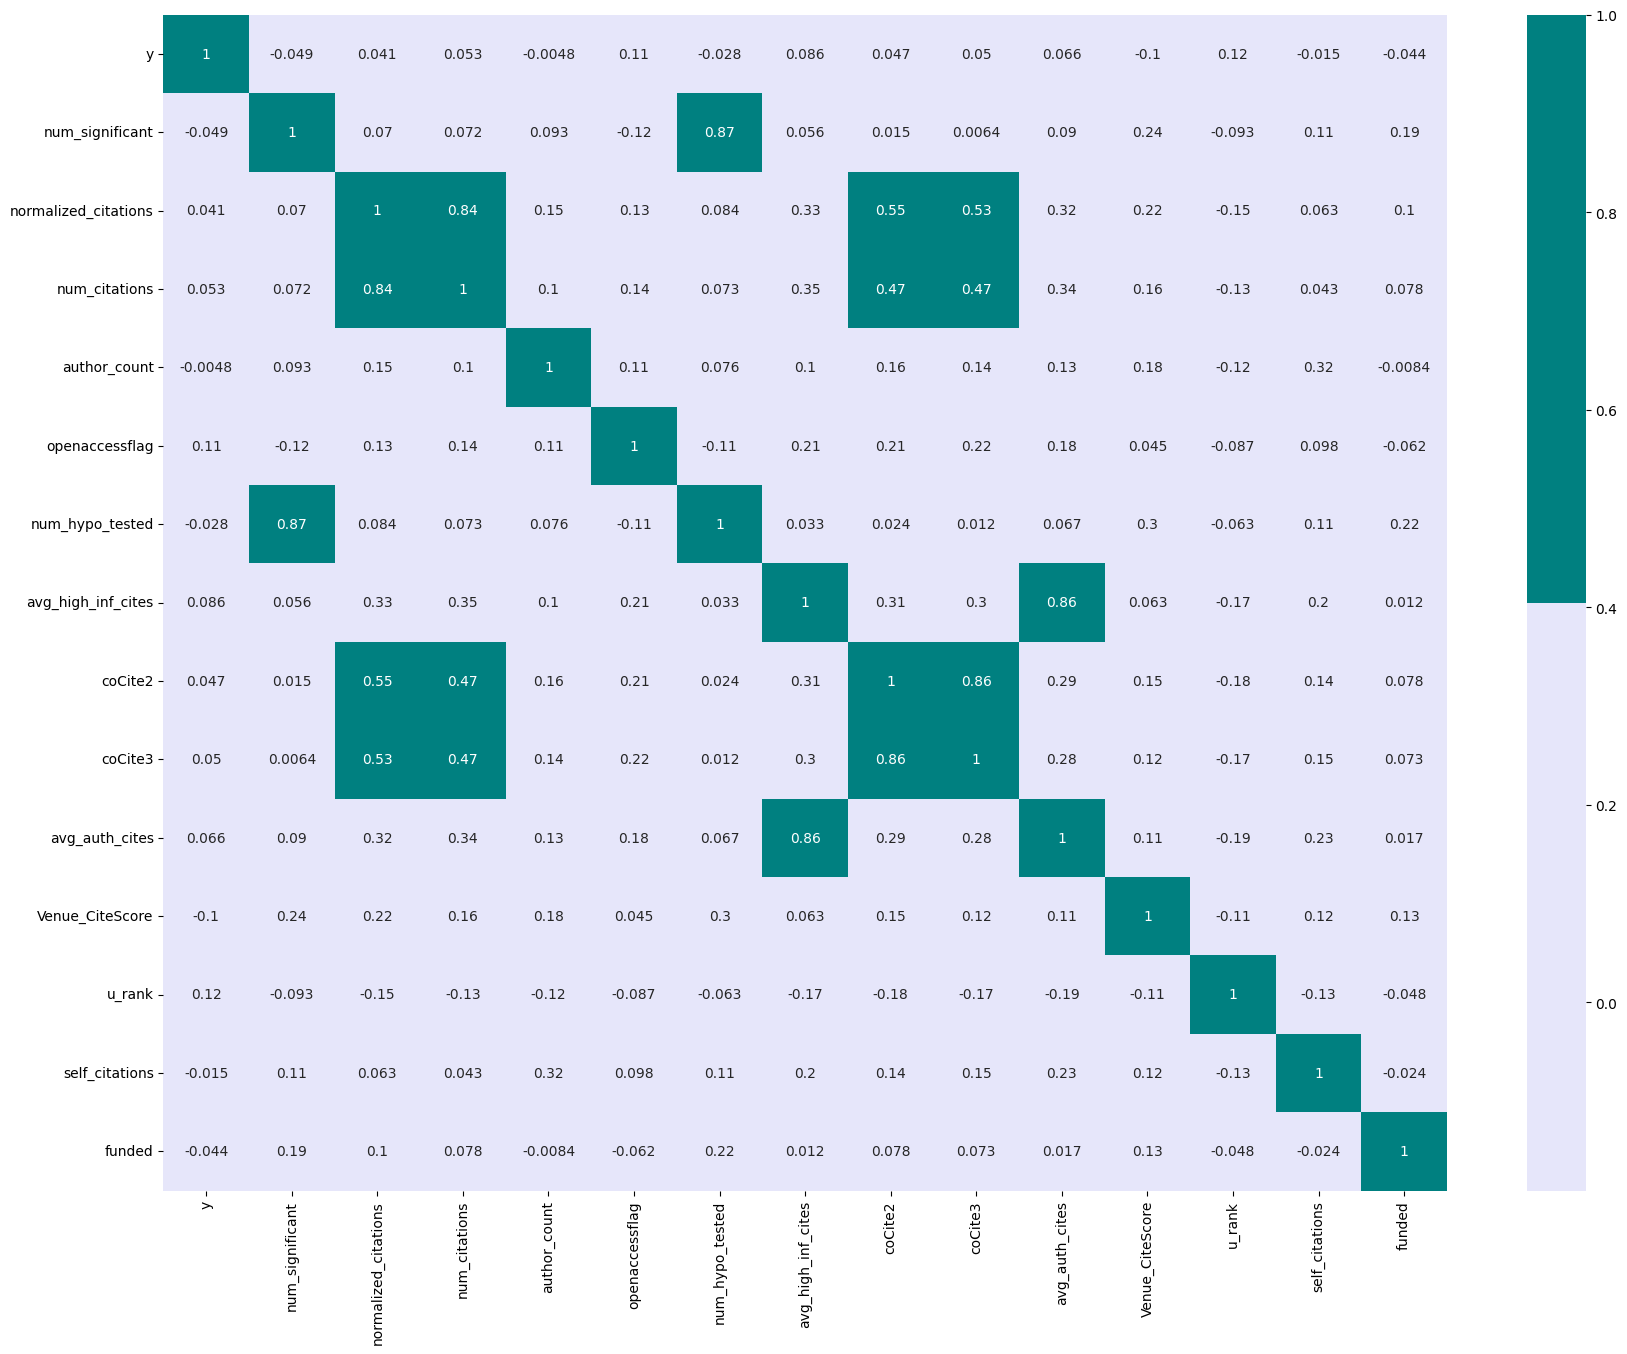

In [ ]:
import seaborn as sb
import matplotlib.pyplot as plt
import os

# Set the figure size
plt.rcParams['figure.figsize'] = 20.7, 15.27 #14.7, 8.27

# Define the lavender and teal color map
cmap_colors = sb.color_palette(["lavender", "teal"])

# Plot the correlation matrix with lavender and teal colors
sb.heatmap(pairwise_correlations_kendall,
           xticklabels=pairwise_correlations_kendall.columns.values,
           yticklabels=pairwise_correlations_kendall.columns.values,
           cmap=cmap_colors,
           annot=True)

# Save the plot in the specified directory
directory = '/content/drive/My Drive/Colab Notebooks/paper_reproducability'
filename = 'correlation_matrix.png'
filepath = os.path.join(directory, filename)
plt.savefig(filepath)

# Display the plot
plt.show()



## Scatter plot

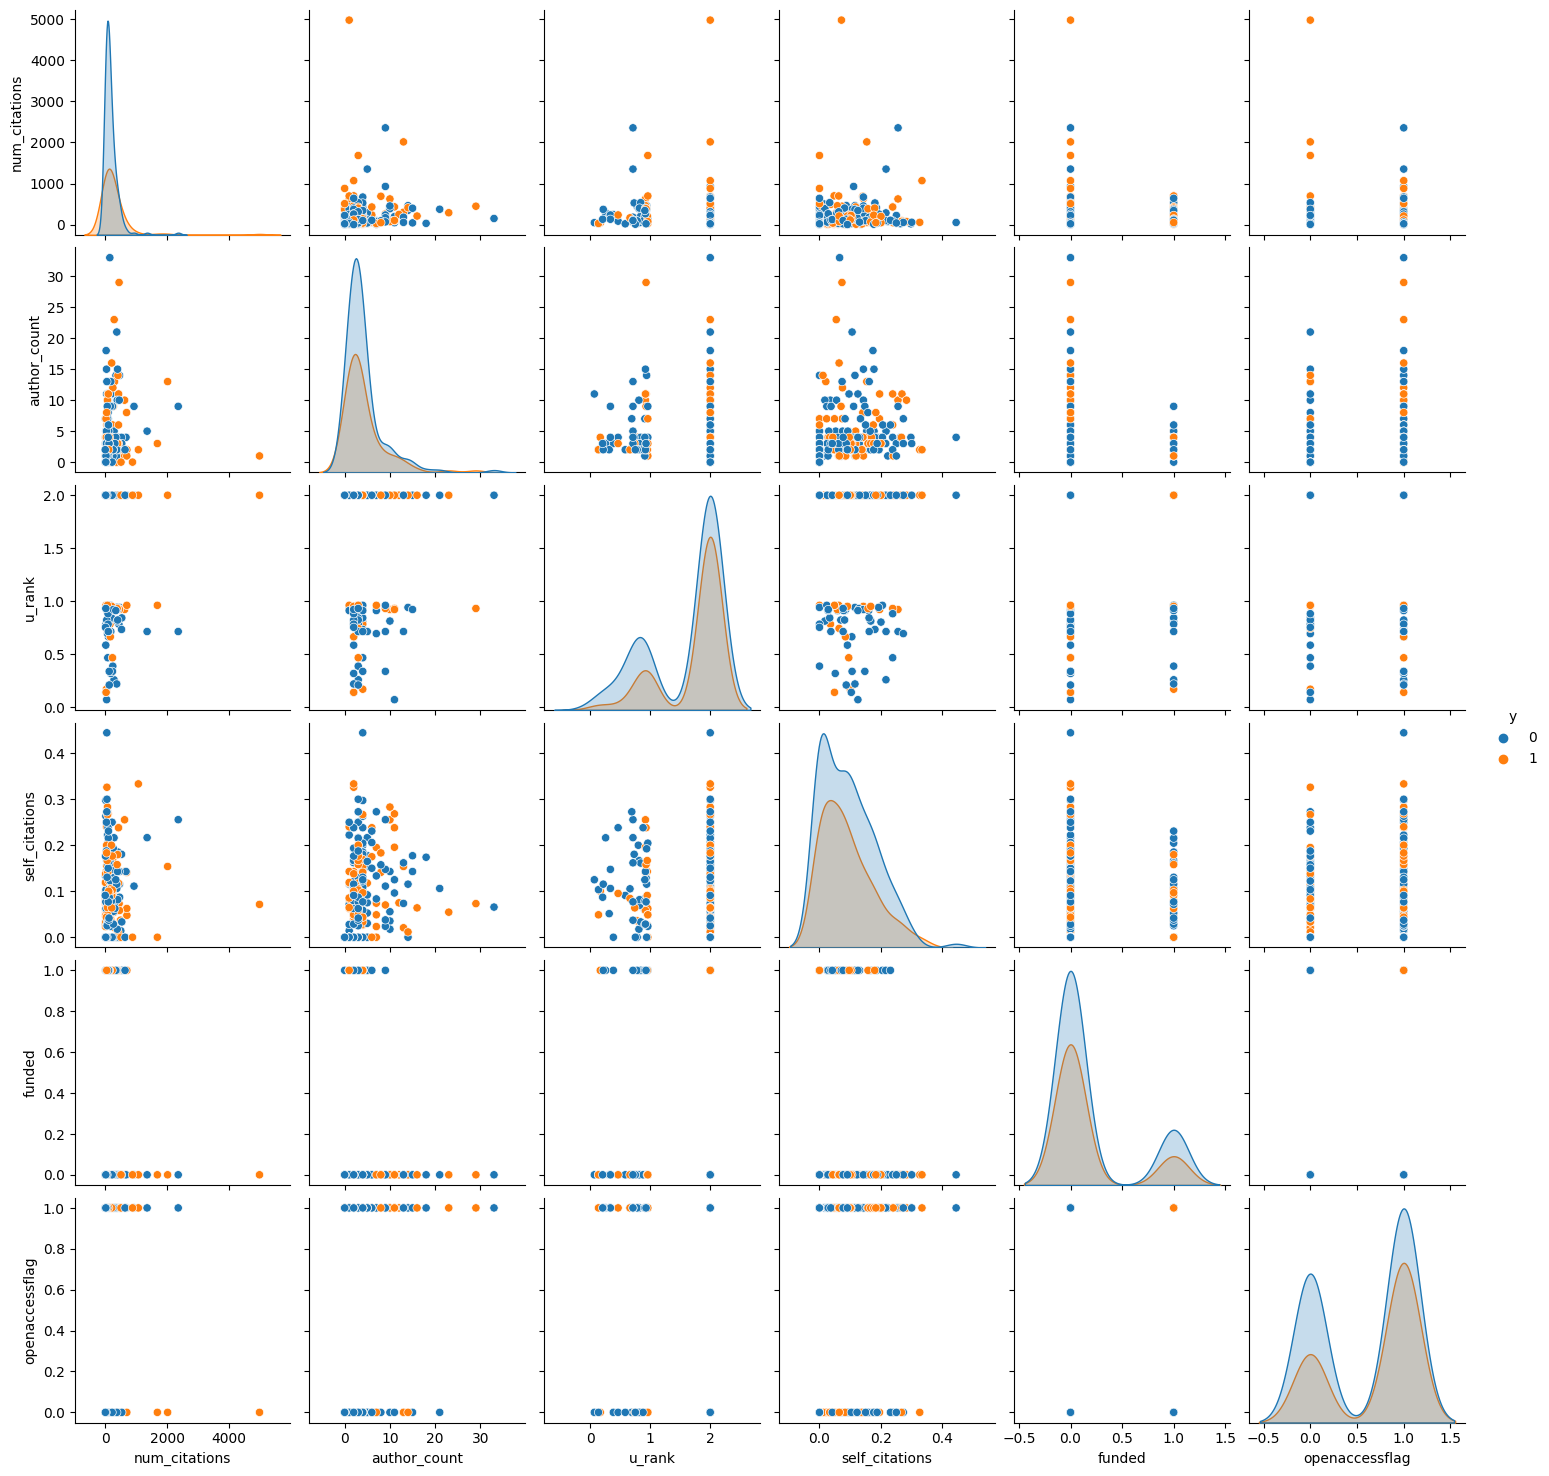

In [ ]:
# This code would generate a grid of scatter plots, where variable A is plotted against B, A is plotted against C, and B is plotted against C. The diagonal of the grid would show histograms for each variable.
sns.pairplot( data=nn_df, vars=('num_citations','author_count','u_rank','self_citations', 'funded', 'openaccessflag'), hue='y' )

## Analysis continued

In [ ]:
import pandas as pd; import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
#control the scaling of plot elements
sns.set_context('paper',font_scale=1.7)
#Retina display to see better quality images.
%config InlineBackend.figure_format = 'retina'
import warnings; warnings.filterwarnings('ignore')

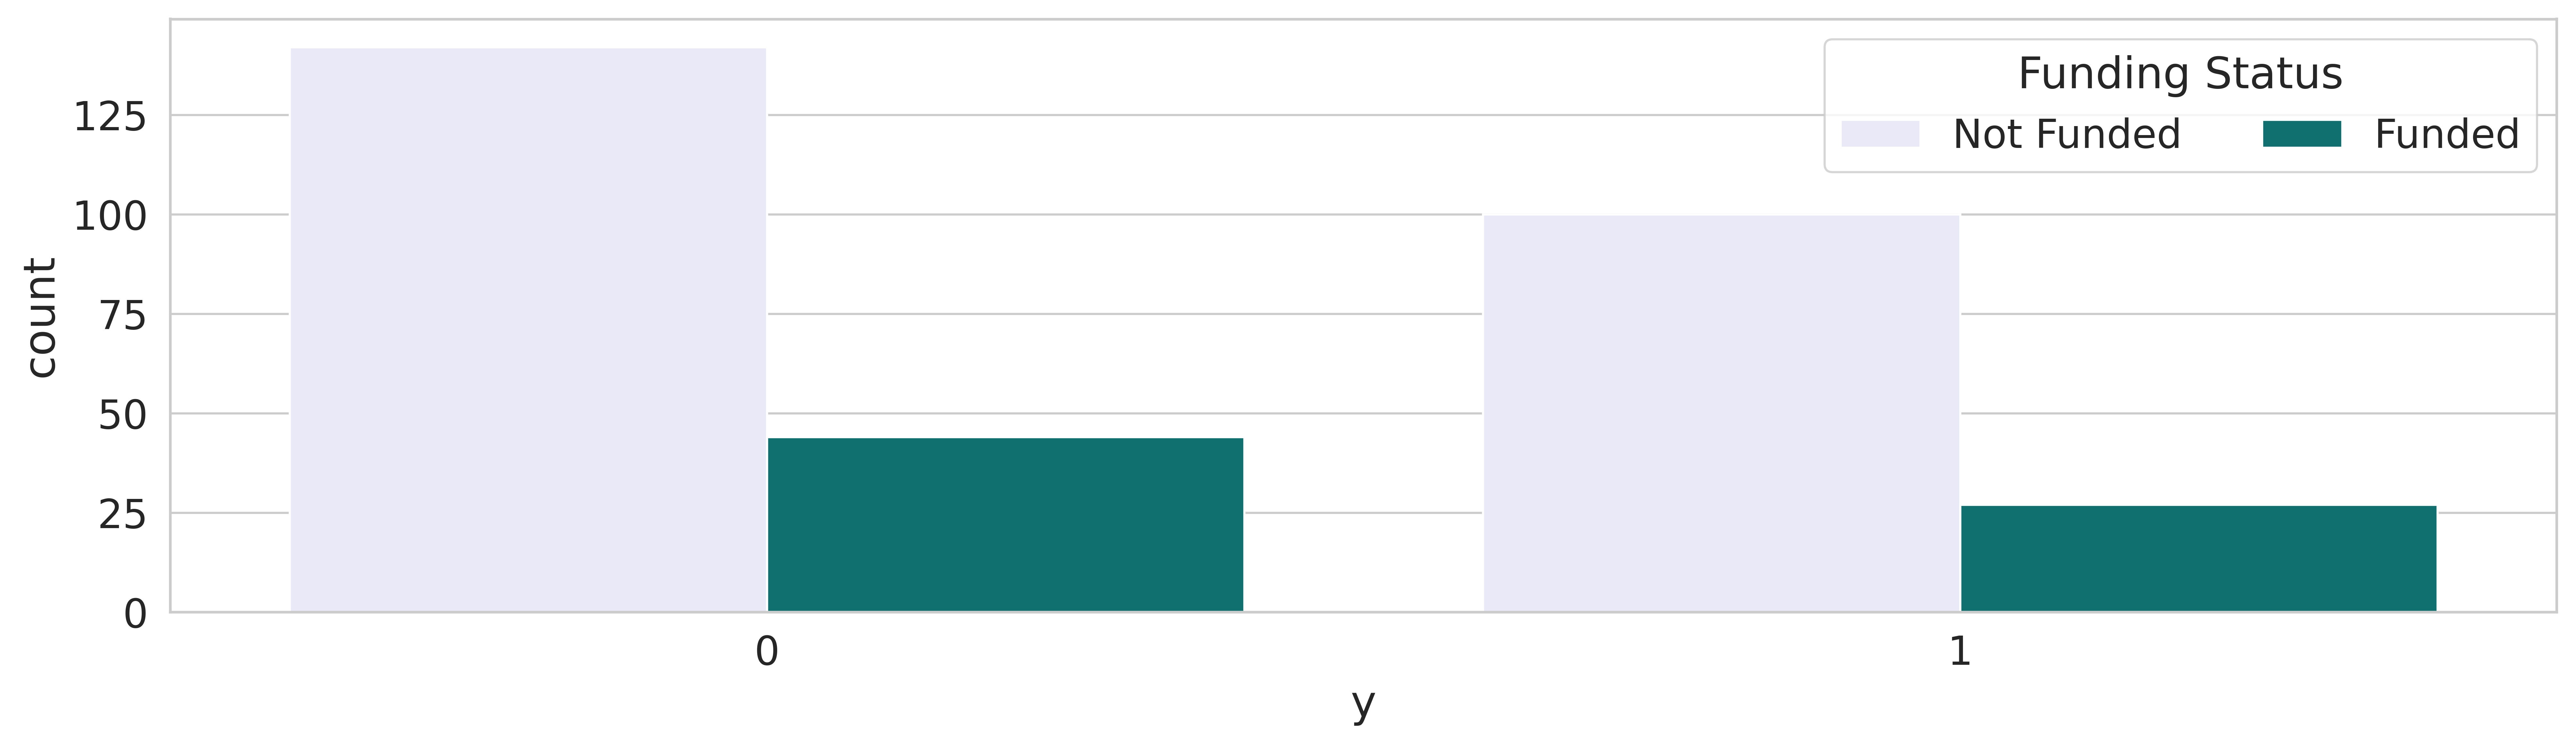

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size and DPI
plt.figure(figsize=(16, 4), dpi=300)

custom_palette = ['lavender', 'teal']

# Create the count plot
ax = sns.countplot(x='y', hue='funded', data=df, palette=custom_palette)

#ax.legend(loc='upper right', bbox_to_anchor=(1.0, 1.0), ncol=2)
ax.legend(title="Funding Status", labels=["Not Funded", "Funded"], loc='upper right', bbox_to_anchor=(1.0, 1.0), ncol=2)


# Save the figure with high resolution
plt.savefig('openaccess.png', bbox_inches='tight', dpi=300)  # Specify the file name and format

plt.show()


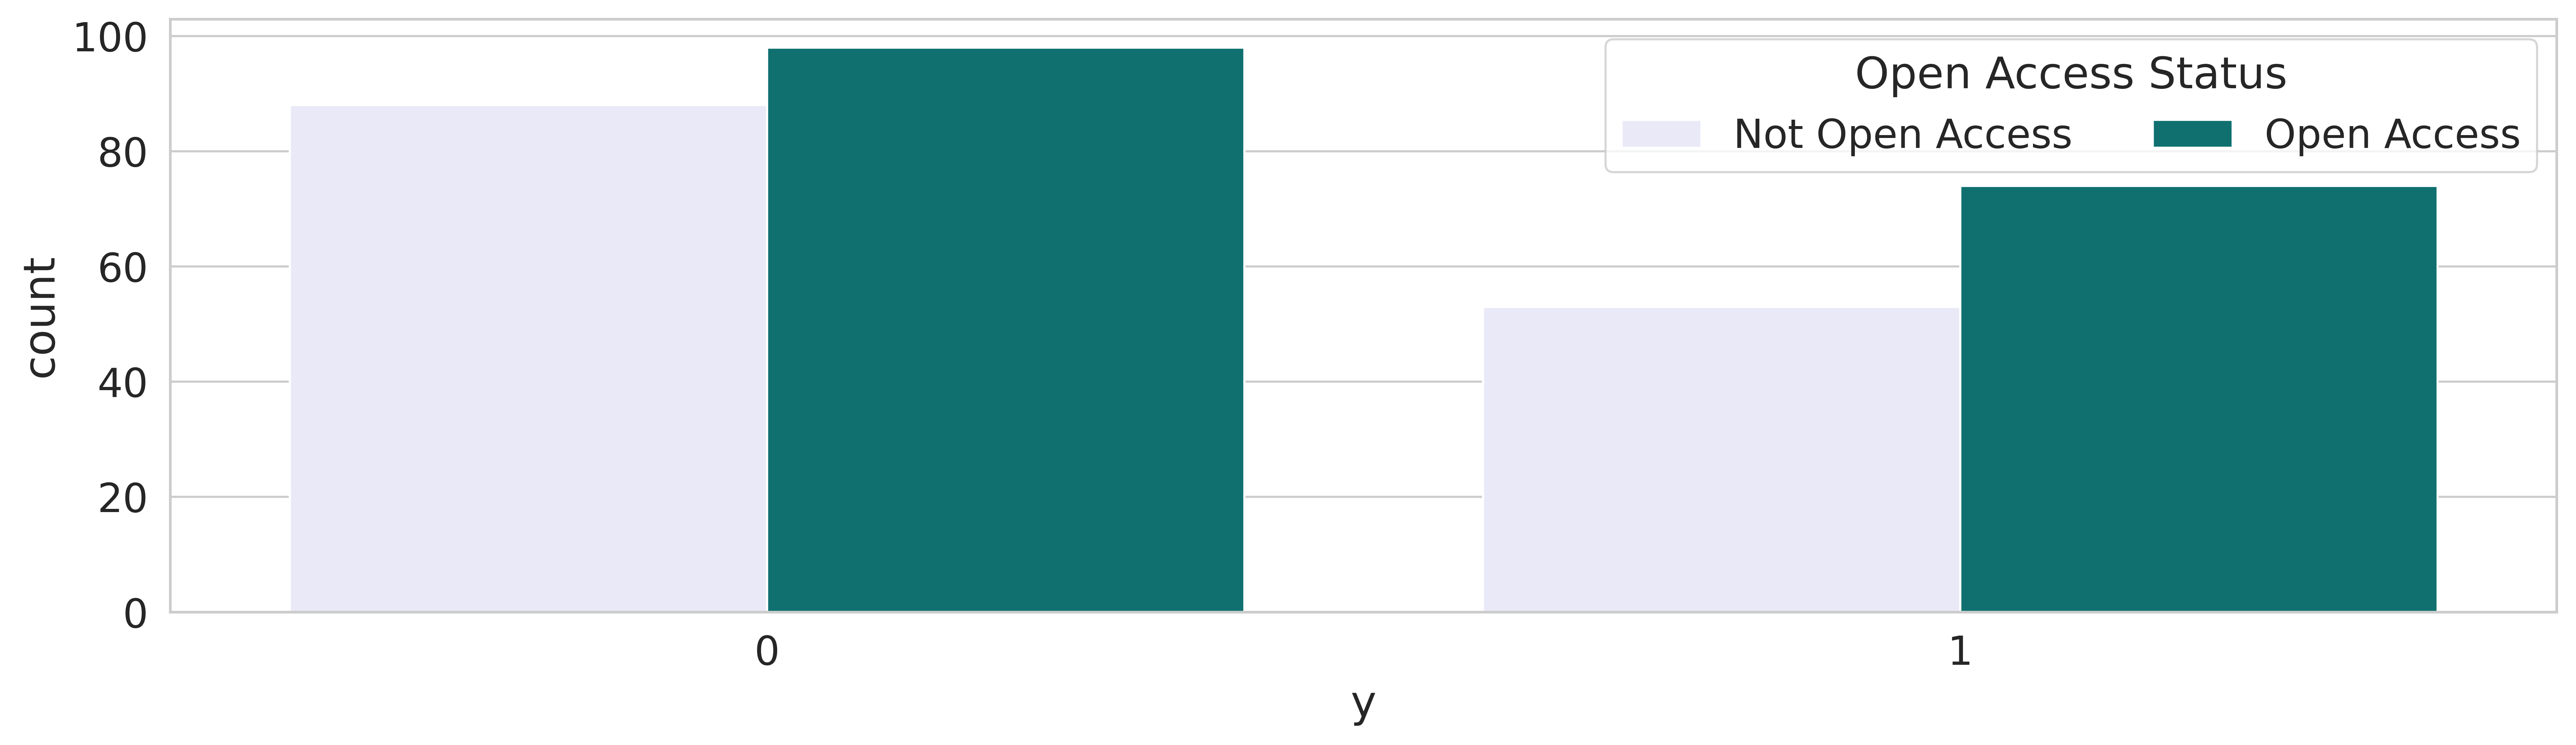

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the custom color palette
custom_palette = ['lavender', 'teal']

# Set the figure size and DPI
plt.figure(figsize=(16, 4), dpi=300)

# Create the count plot with the custom palette
ax = sns.countplot(x='y', hue='openaccessflag', data=df, palette=custom_palette)

# Customize legend placement and orientation
ax.legend(title="Open Access Status", labels = ['Not Open Access', 'Open Access'], loc='upper right', bbox_to_anchor=(1.0, 1.0), ncol=2)

# Save the figure with high resolution
plt.savefig('openaccess.png', bbox_inches='tight', dpi=300)

plt.show()


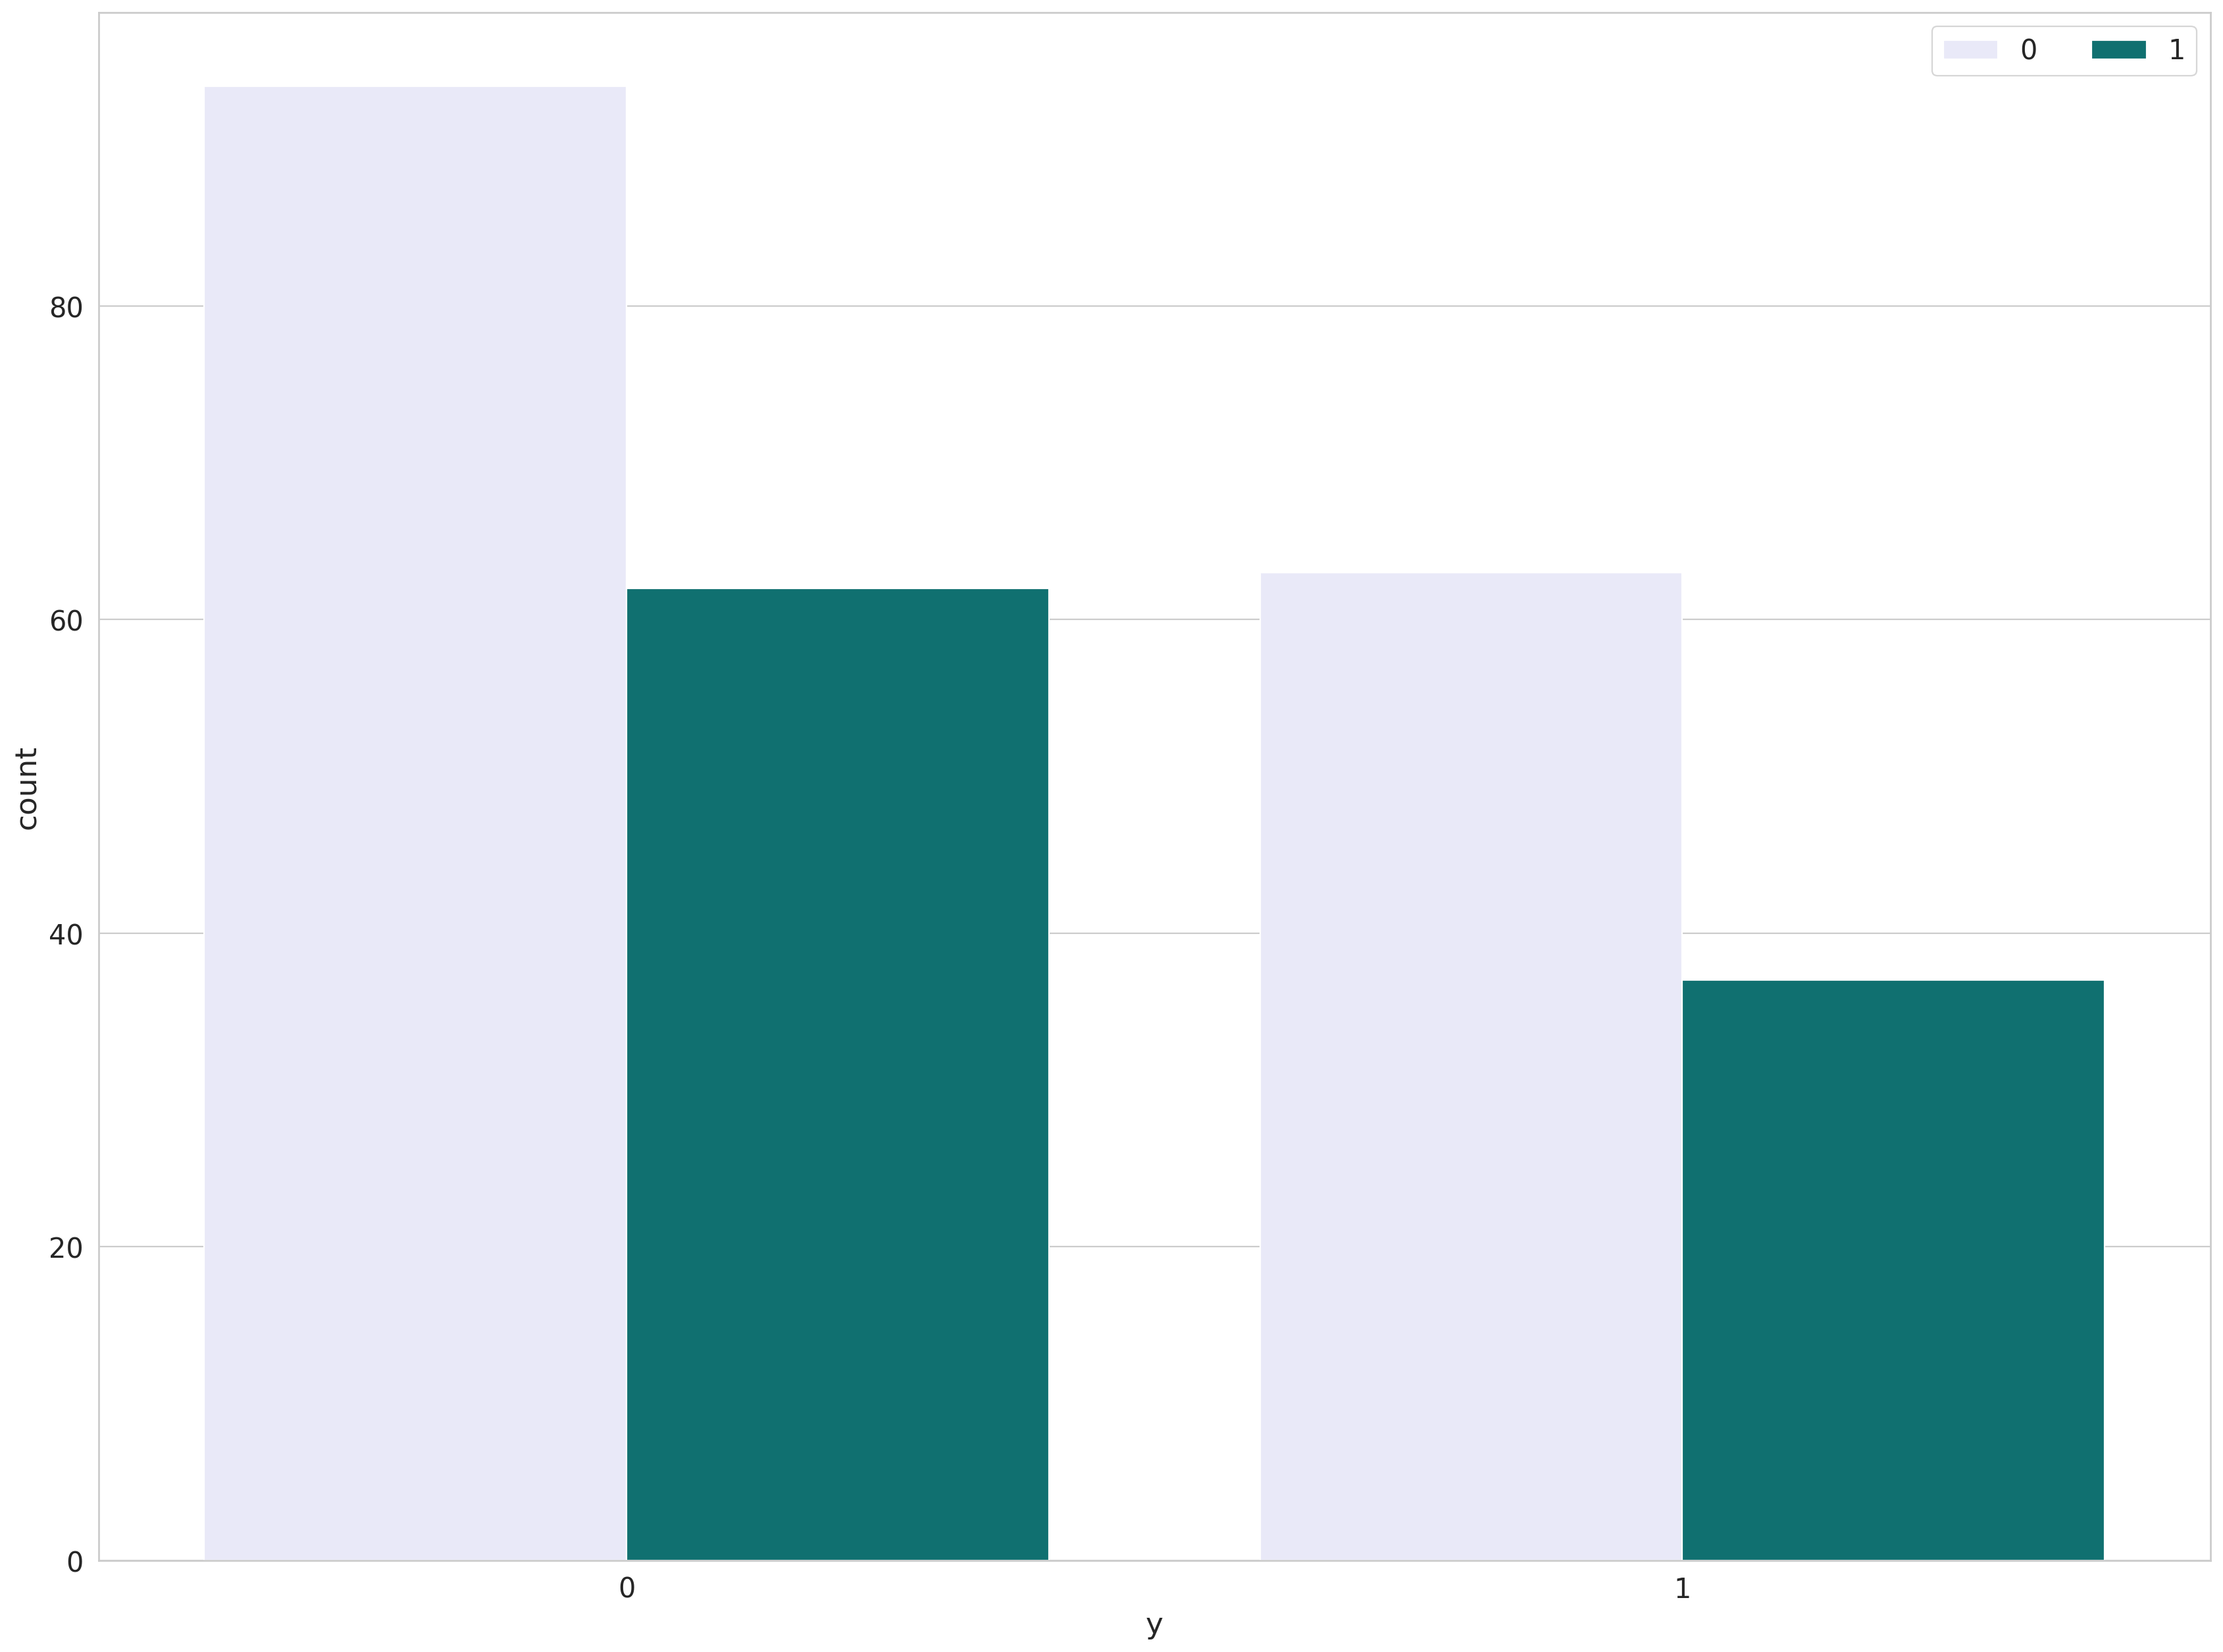

In [ ]:
# Create the count plot with the custom palette
ax = sns.countplot(x='y', hue='sentiment', data=nn_df, palette=custom_palette)

# Customize legend placement and orientation
ax.legend(loc='upper right', bbox_to_anchor=(1.0, 1.0), ncol=2)  # ncol specifies the number of columns

# Save the figure with high resolution
plt.savefig('sentiment.png', bbox_inches='tight', dpi=300)

plt.show()

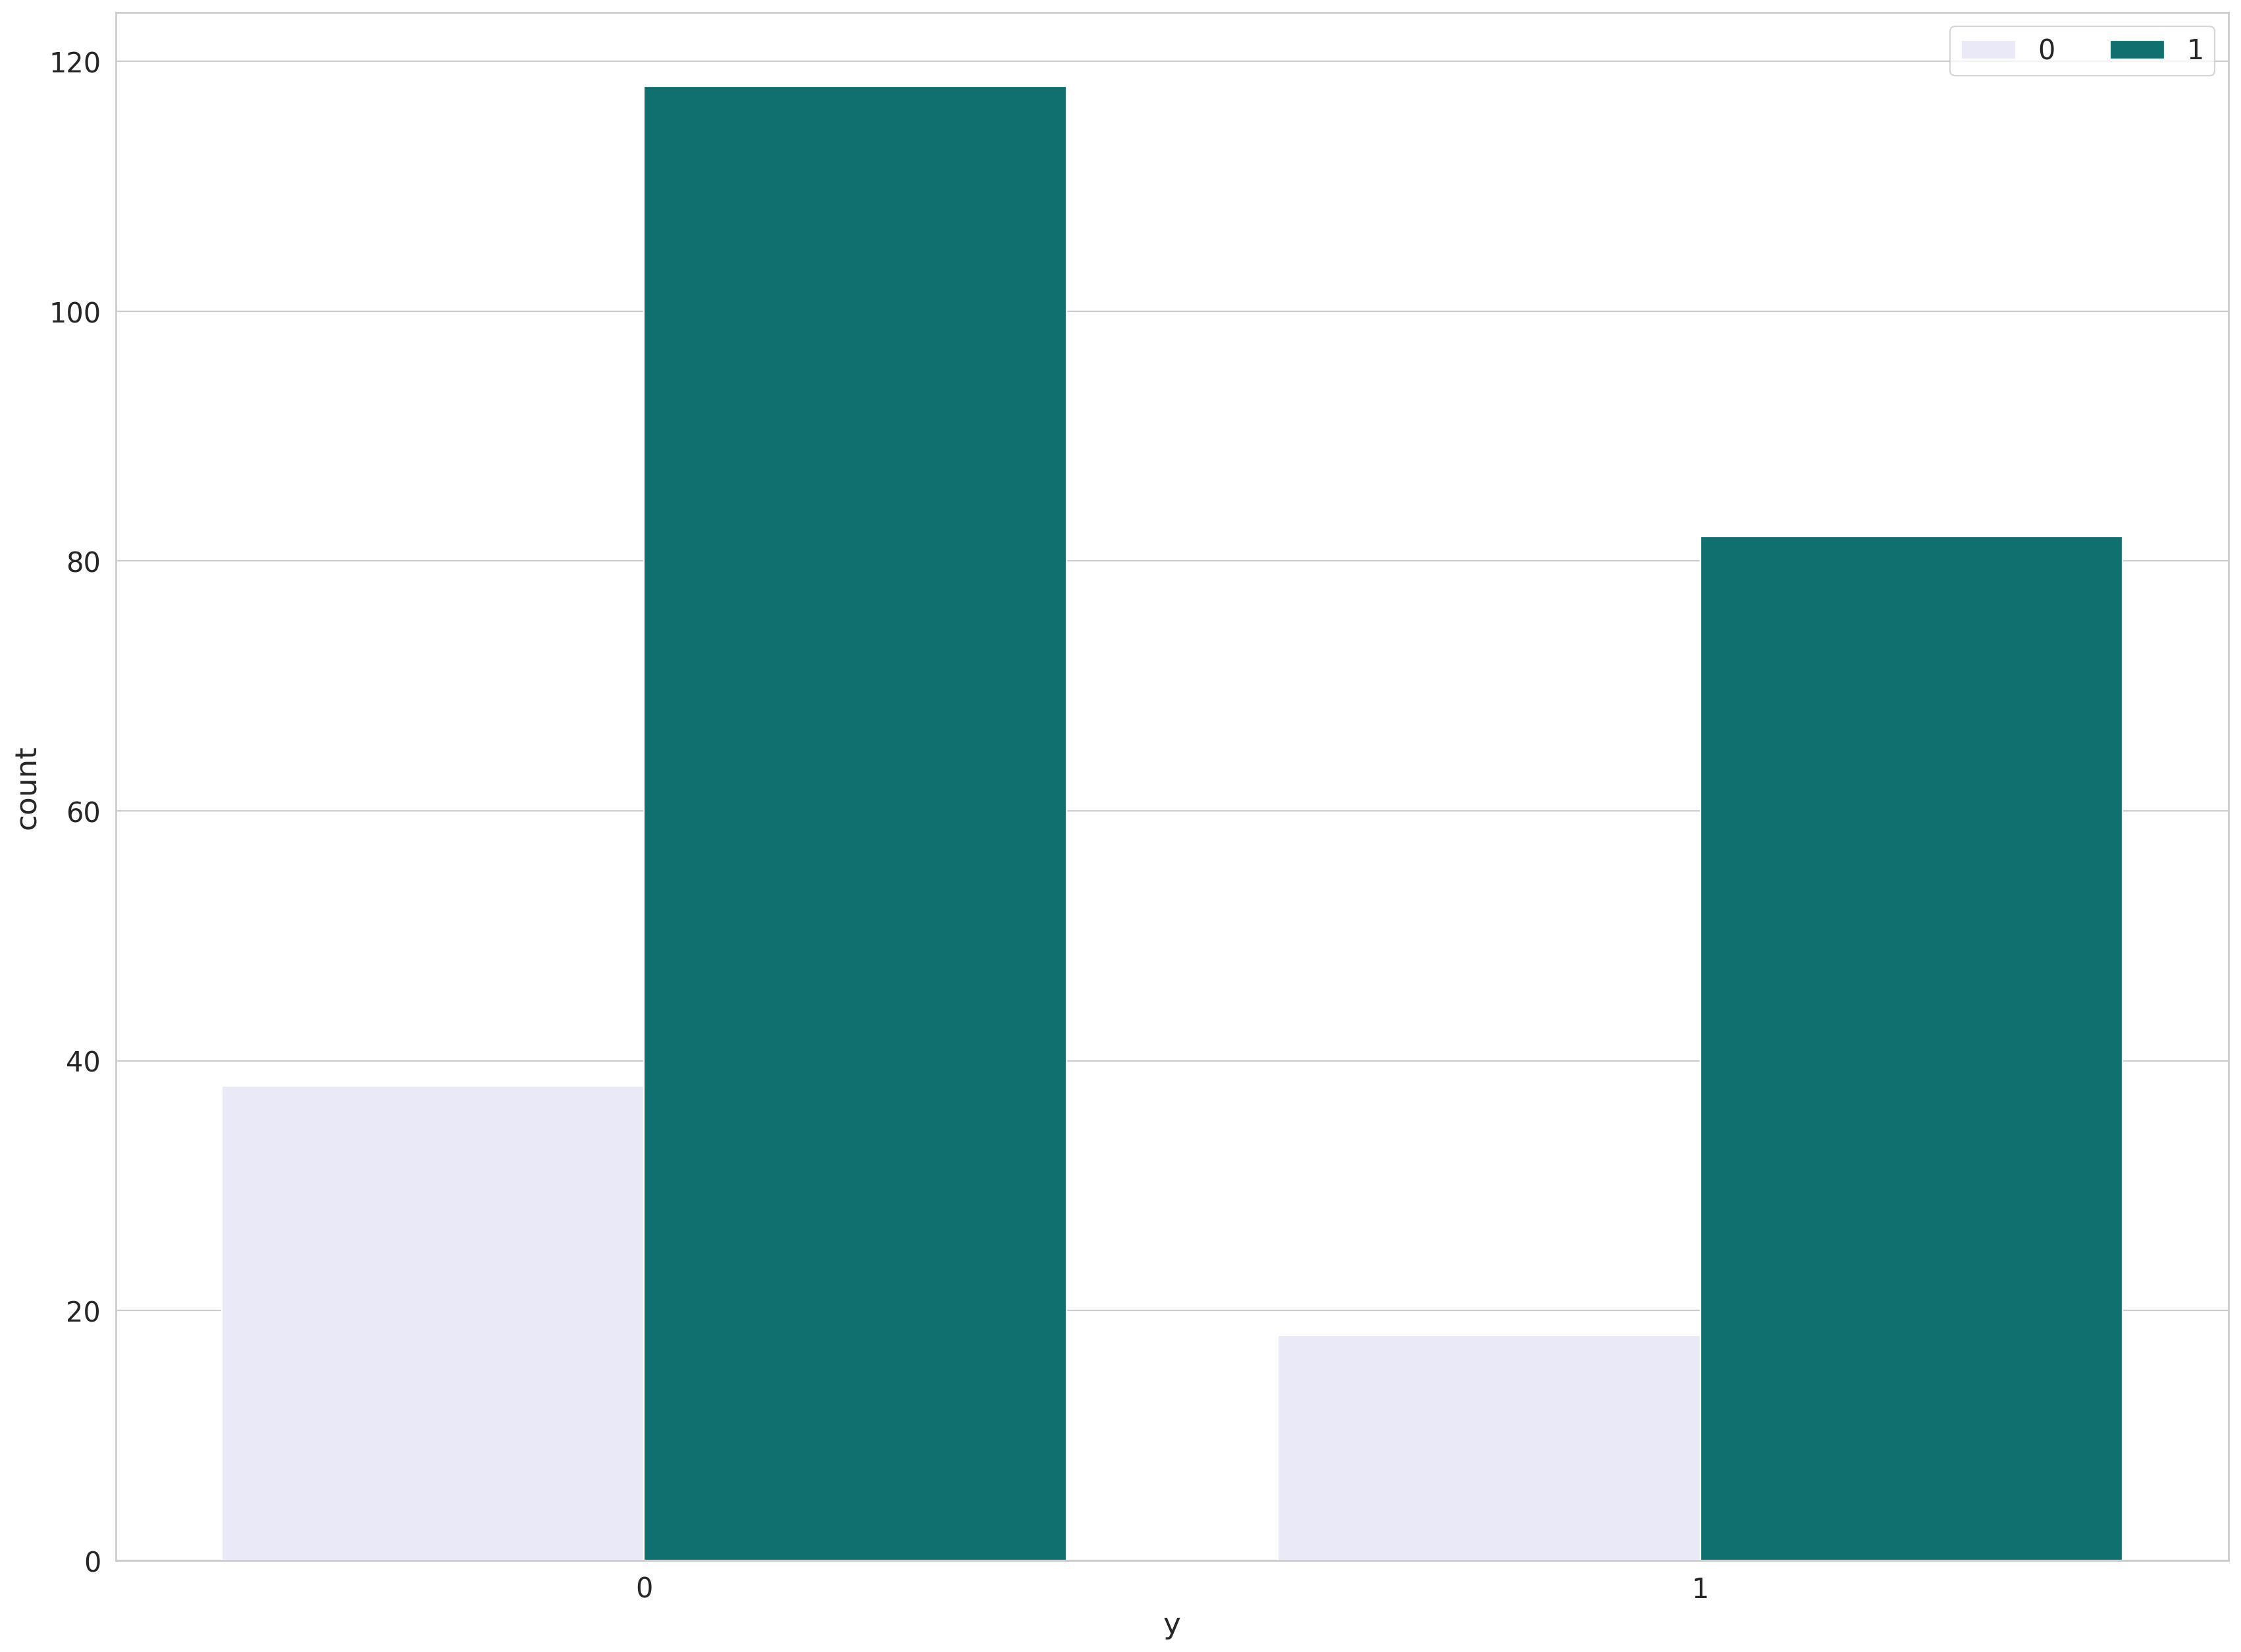

In [ ]:
# Create the count plot with the custom palette
ax = sns.countplot(x='y', hue='extend_p', data=nn_df, palette=custom_palette)

# Customize legend placement and orientation
ax.legend(loc='upper right', bbox_to_anchor=(1.0, 1.0), ncol=2)  # ncol specifies the number of columns

# Save the figure with high resolution
plt.savefig('sentiment.png', bbox_inches='tight', dpi=300)

plt.show()

## Exploratory analysis of the  data (not used in the paper)

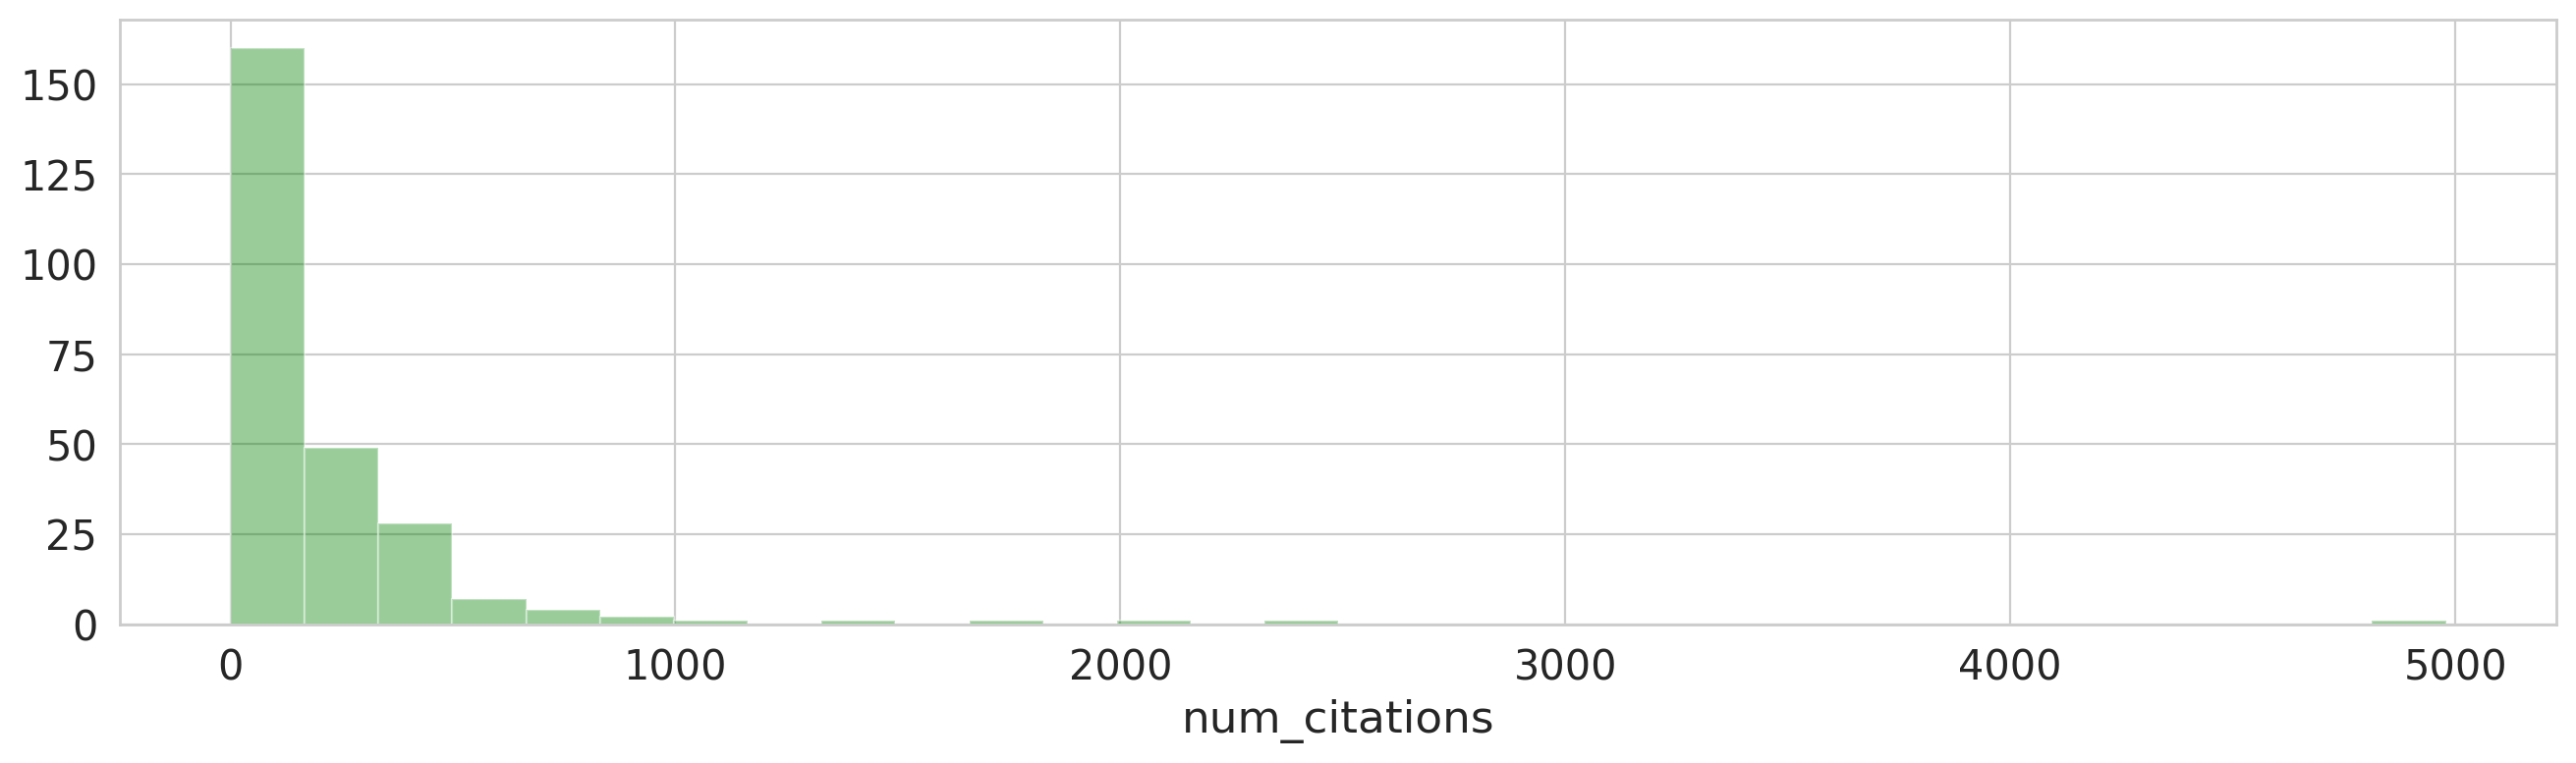

In [ ]:
plt.figure(figsize = (16,4))
sns.distplot(nn_df['num_citations'].dropna(),kde=False,color='green',bins=30); # try without dropna(), what do you see?



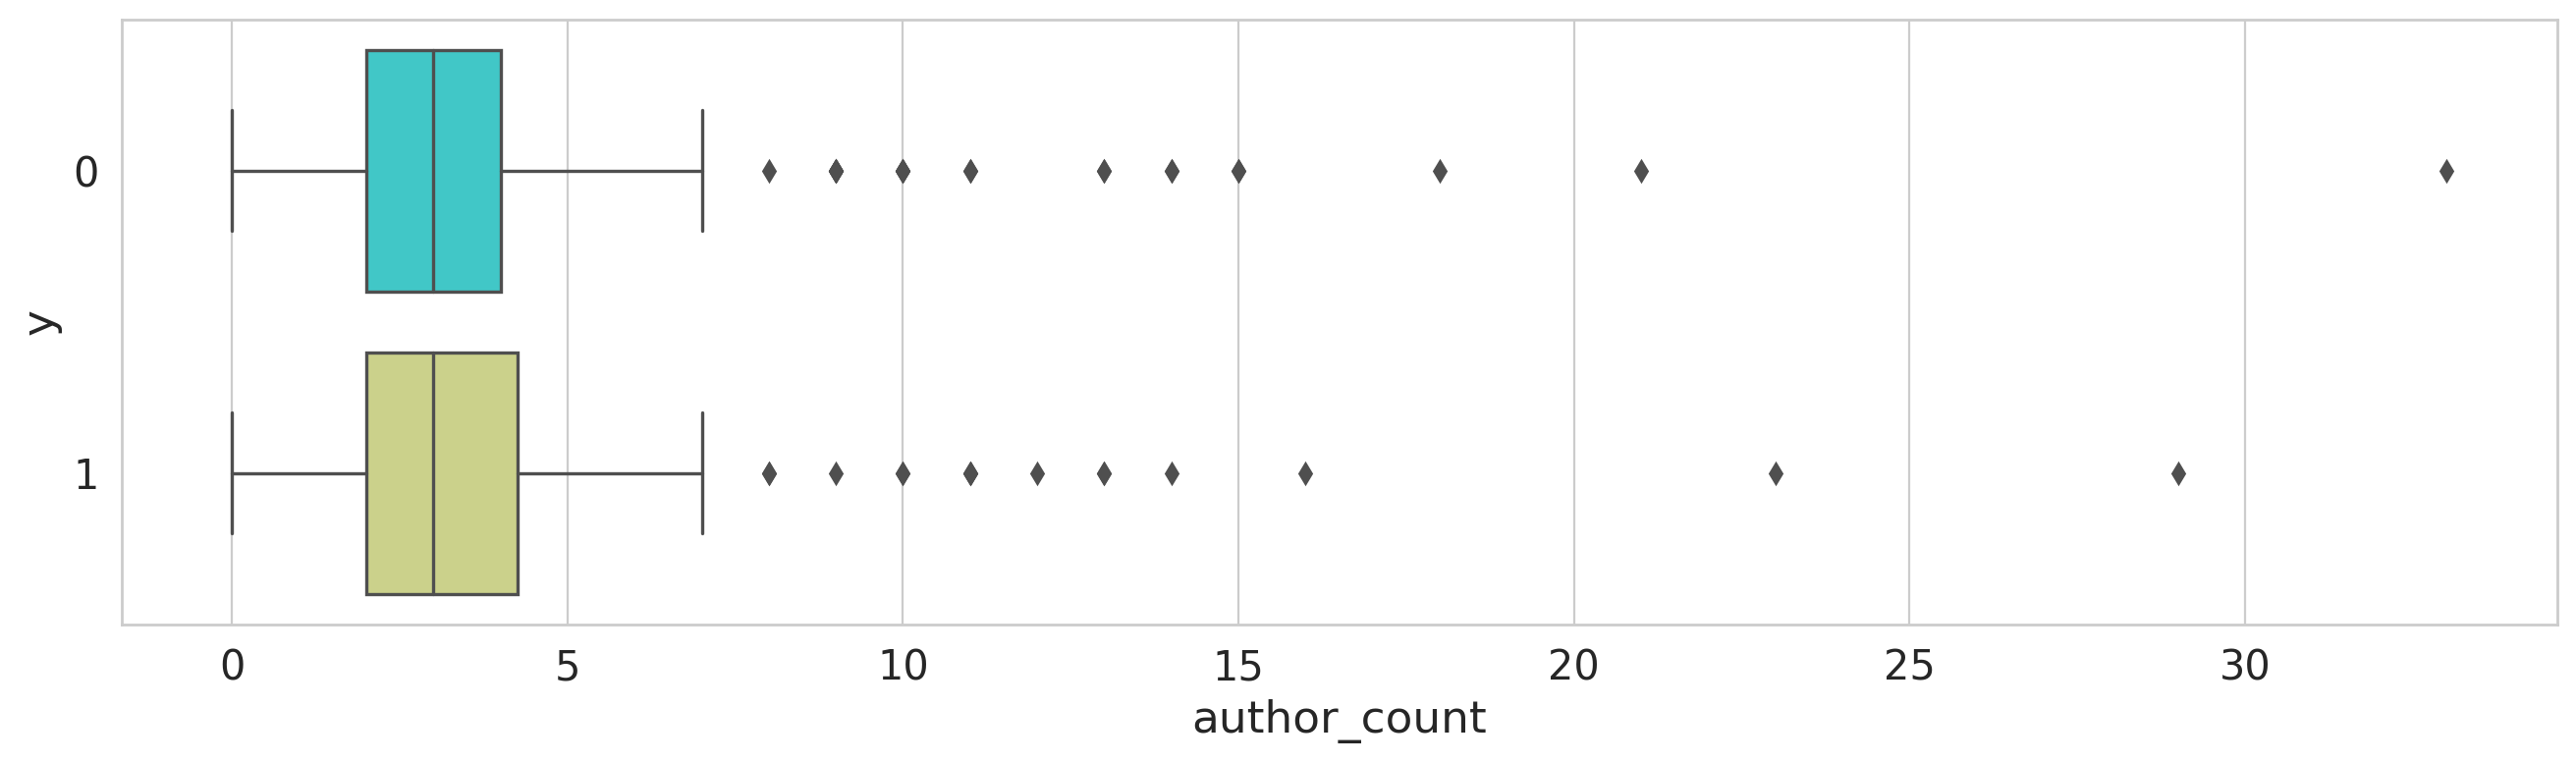

In [ ]:
plt.figure(figsize=(16, 4))
sns.boxplot(x='author_count', y = 'y', data=nn_df, palette = 'rainbow', orient='h');

In [ ]:
nn_df[['y', 'author_count']].groupby('y').mean()

author_count
y              
0       4.00641
1       4.19000

In [ ]:
# Importing required method from sklearn
from sklearn.model_selection import train_test_split
X = nn_df.drop(['y', 'doi', 'title', 'Venue_subject'], axis = 1)
y = nn_df['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
X.head(5)

num_citations  author_count  u_rank  self_citations  \
0            465             4     2.0        0.086957   
2             14             0     2.0        0.000000   
4             19             0     2.0        0.000000   
5            410             0     2.0        0.000000   
6            160             0     2.0        0.000000   

   upstream_influential_methodology_count  citationVelocity  \
0                                       2                56   
2                                       0                 0   
4                                       0                 0   
5                                       0                29   
6                                       0                 6   

   influentialCitationCount  references_count  openaccessflag  \
0                       110               111               1   
2                         1                25               0   
4                         4                10               1   
5                        78                37               1   
6                        16                23               0   

   normalized_citations  ...  Venue_Scholarly_Output  Venue_Percent_Cited  \
0             42.272727  ...              467.000000            88.000000   
2              0.636364  ...              298.000000            62.000000   
4              2.111111  ...              409.311156            52.160947   
5             20.500000  ...              467.000000            88.000000   
6              8.000000  ...              322.000000            85.000000   

   Venue_CiteScore  Venue_SNIP  Venue_SJR  Venue_subject_code  score1  gender  \
0        15.000000    7.901000   20.36100            1.000000       0     0.0   
2         2.500000    1.525000    1.79600            1.000000       0     0.0   
4         3.242882    0.983931    0.66701            1.900272       0     0.0   
5        15.000000    7.901000   20.36100            1.000000       0     0.0   
6        13.100000    7.204000   18.47600            1.000000       5     0.0   

   table  figure  
0      5       1  
2      0       0  
4      0       0  
5      0       0  
6      0       0  

[5 rows x 46 columns]

In [ ]:
from sklearn.linear_model import LogisticRegression
logR = LogisticRegression(penalty='l2', max_iter = 10000, C=0.5, verbose = 5, n_jobs= -1)

In [ ]:
X_train = pd.DataFrame(X_train, columns = X_train.columns)
X_train.head(2)

logR.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


LogisticRegression(C=0.5, max_iter=10000, n_jobs=-1, verbose=5)

In [ ]:
pred_train = logR.predict(X_train)
print("Training score (mean accuracy): ", logR.score(X_train, y_train))
pred_test = logR.predict(X_test)
print("Test Score (mean accuracy): ", logR.score(X_test, y_test))

## have not used this in the paper

In [ ]:
from sklearn.metrics import classification_report
print("*****************************************************")
print("Report on training data:")
print(classification_report(y_train,pred_train))
print("*****************************************************")
print("*****************************************************\n")
print("Report on test data:")
print(classification_report(y_test,pred_test))
print("*****************************************************")

*****************************************************
Report on training data:
              precision    recall  f1-score   support

           0       0.79      0.88      0.83       112
           1       0.71      0.54      0.62        59

    accuracy                           0.77       171
   macro avg       0.75      0.71      0.72       171
weighted avg       0.76      0.77      0.76       171

*****************************************************
*****************************************************

Report on test data:
              precision    recall  f1-score   support

           0       0.57      0.89      0.70        44
           1       0.71      0.29      0.41        41

    accuracy                           0.60        85
   macro avg       0.64      0.59      0.56        85
weighted avg       0.64      0.60      0.56        85

*****************************************************


In [ ]:
#True Positive (TP): The top-left value (28) represents the number of instances that were actually positive (belonged to the positive class) and were correctly predicted as positive by the model.
#False Positive (FP): The top-right value (17) represents the number of instances that were actually negative (belonged to the negative class) but were incorrectly predicted as positive by the model.
#False Negative (FN): The bottom-left value (13) represents the number of instances that were actually positive but were incorrectly predicted as negative by the model.
#True Negative (TN): The bottom-right value (10) represents the number of instances that were actually negative and were correctly predicted as negative by the model.


from sklearn.metrics import confusion_matrix
print("Confusion Matrix from the test data:\n")
print(confusion_matrix(y_test, pred_test))

Confusion Matrix from the test data:

[[39  5]
 [29 12]]


In [ ]:
df_m = pd.DataFrame(confusion_matrix(y_test, pred_test),
                    columns = ["Predicted False", "Predicted True"],
                    index=["Actual False", "Actual True"])
df_m.style.background_gradient(cmap = 'Greens')

In [ ]:
# predicting probabilities for the test data
prob_test_set = logR.predict_proba(X_test)#, predictions

In [ ]:
print("Predicted class for the first 5 datapoints in test set:")
print(pred_test[0:5])
print("\nPredicted probabilities for first 5 datapoints in test set:")
print(prob_test_set[0:5])

Predicted class for the first 5 datapoints in test set:
[1 1 1 0 0]

Predicted probabilities for first 5 datapoints in test set:
[[0.25060024 0.74939976]
 [0.46334082 0.53665918]
 [0.02695744 0.97304256]
 [0.57738723 0.42261277]
 [0.79388411 0.20611589]]


In [ ]:
df_prob = pd.DataFrame(prob_test_set, columns = ['pr_0', 'pr_1'])
df_prob["predicted_class"] = pred_test
df_prob.head()

pr_0      pr_1  predicted_class
0  0.250600  0.749400                1
1  0.463341  0.536659                1
2  0.026957  0.973043                1
3  0.577387  0.422613                0
4  0.793884  0.206116                0

In [ ]:
y.head()

0    0
2    1
4    0
5    1
6    0
Name: y, dtype: int64

# Odds ratio

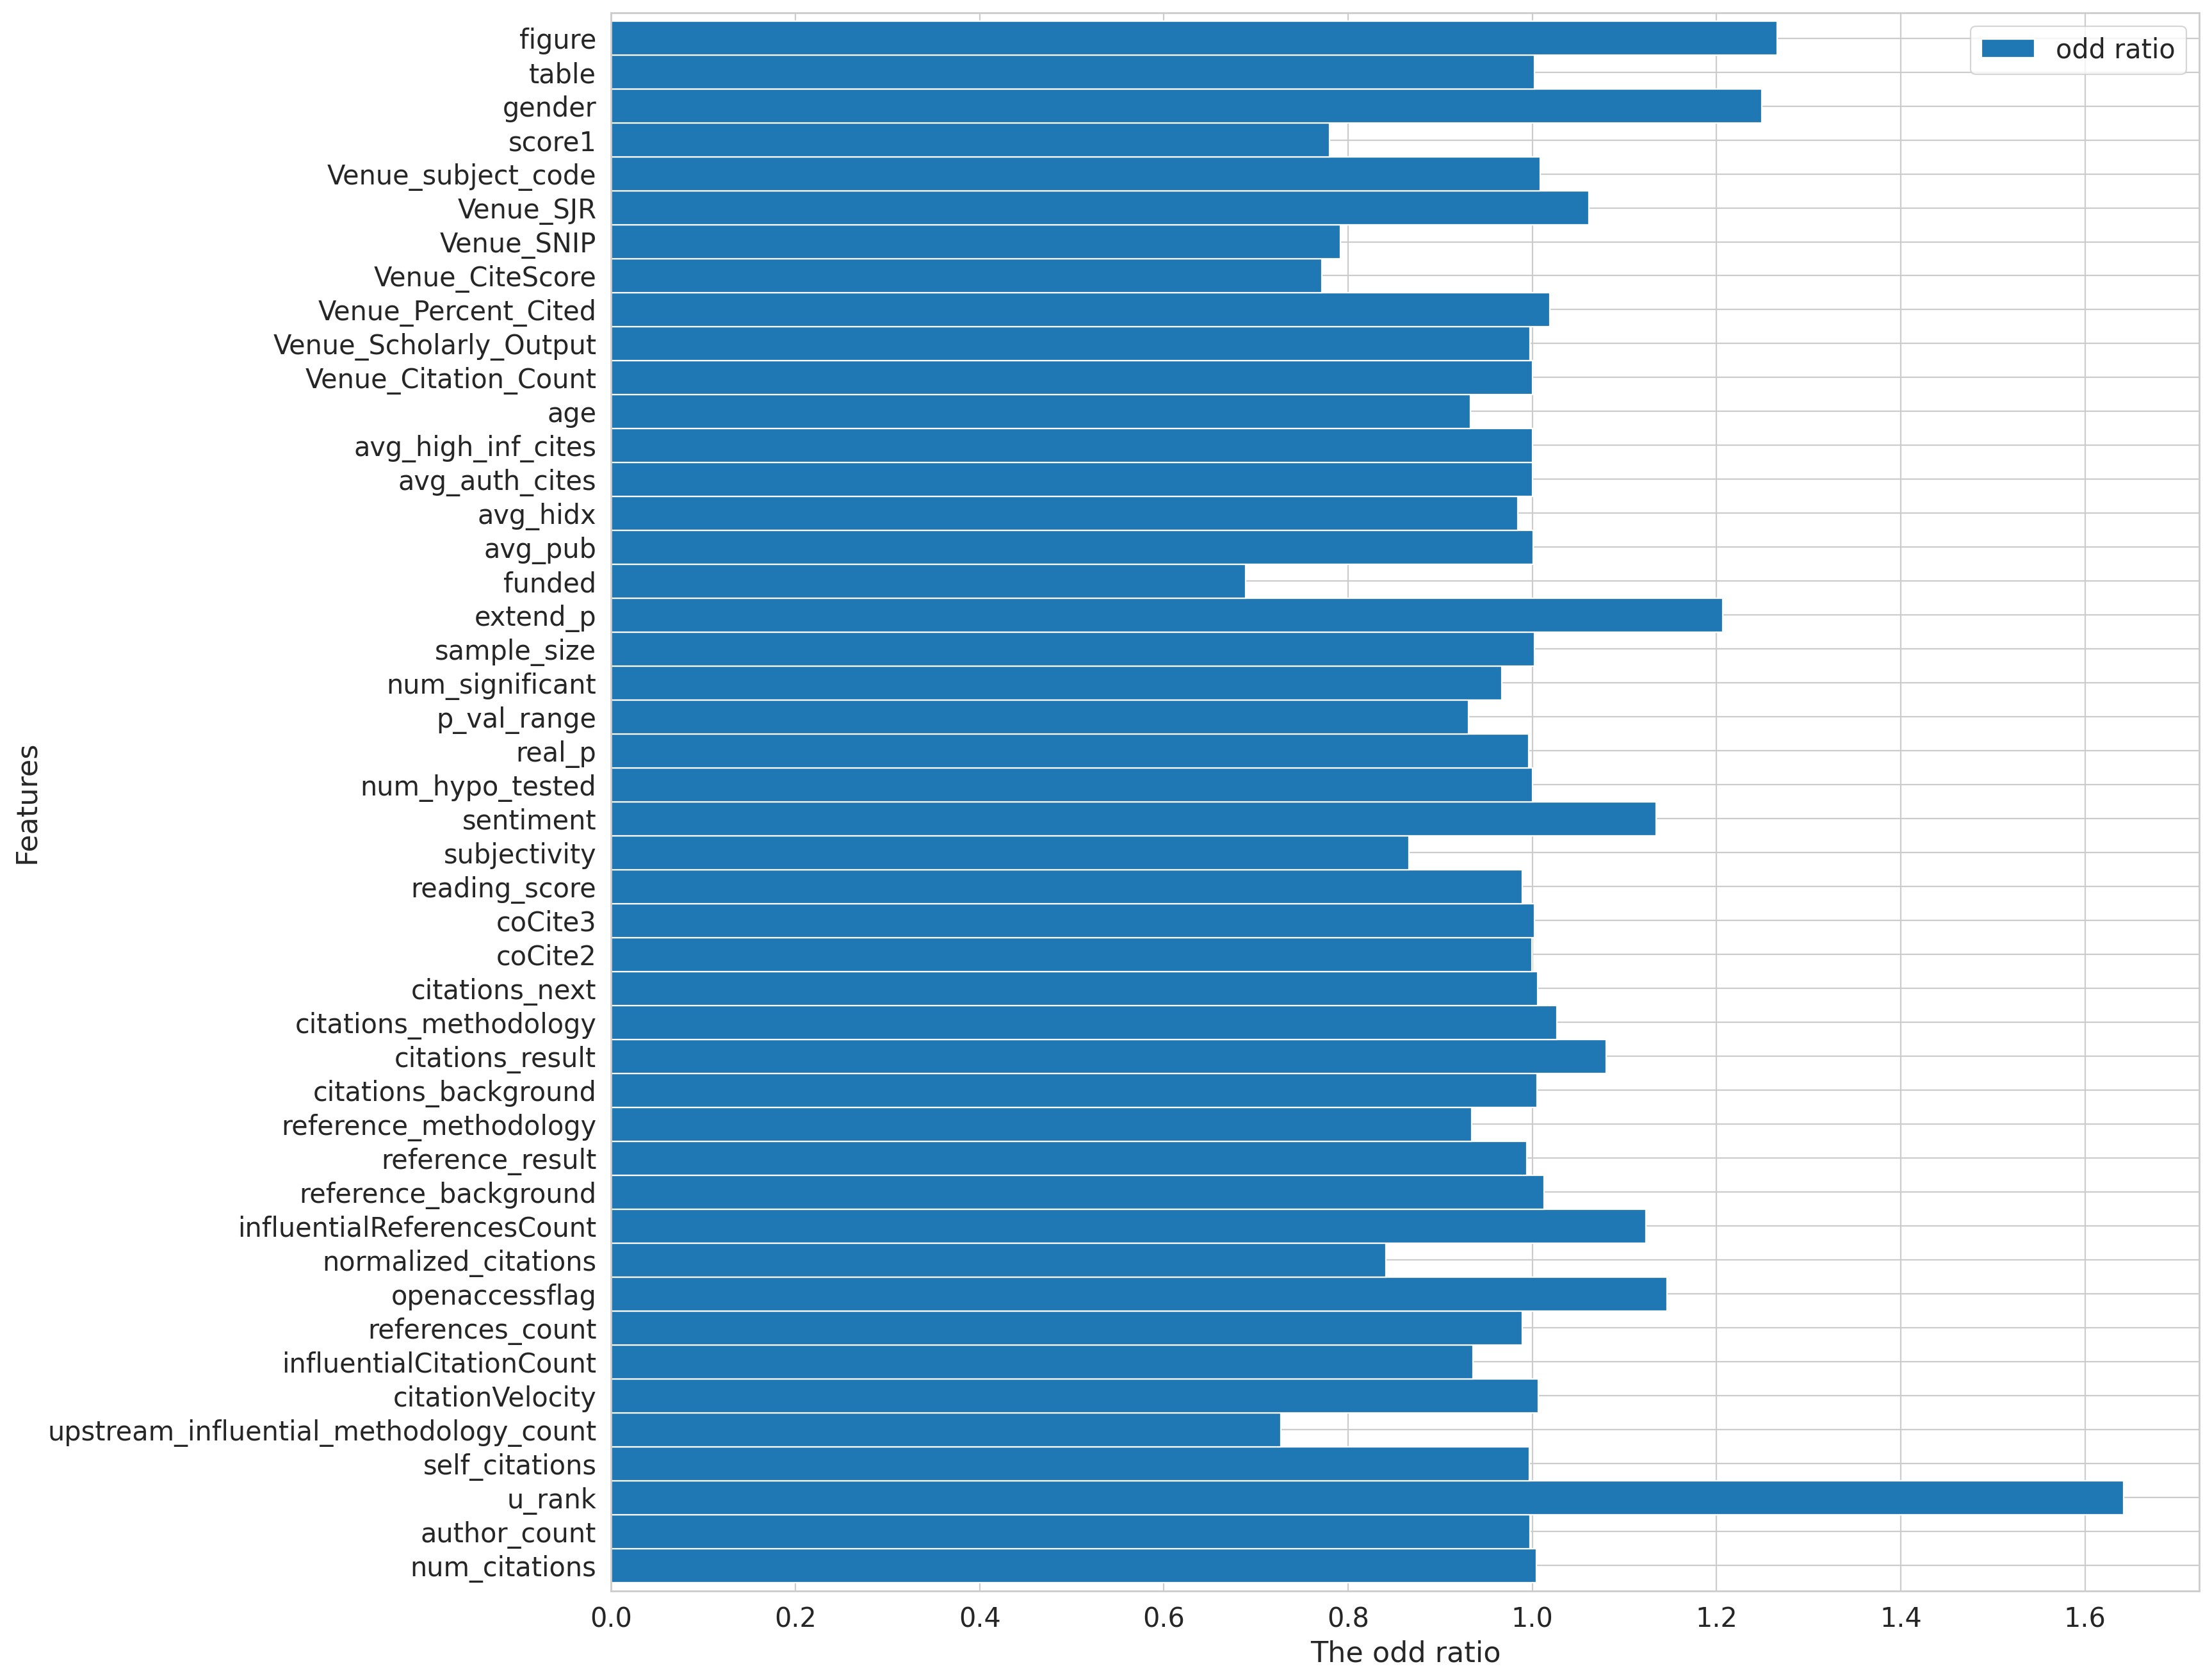

In [ ]:
# the length and direction of the bars provide insights into the relative importance and directionality of the features in relation to the target variable or the model's predictions.
# In logistic regression, the coefficients represent the log-odds or logarithm of the odds of the target variable based on the feature values.
#The odds ratio is the exponential of the coefficient and provides an interpretation of the effect of the feature on the odds of the event occurring.
# An odds ratio greater than 1 indicates a positive association, while an odds ratio less than 1 indicates a negative association.

coeffs = pd.DataFrame(np.exp(logR.coef_).T, X_train.columns, columns=['odd ratio'])

coeffs.plot(kind='barh', figsize=(16, 16), width = 1)
plt.xlabel('The odd ratio', fontsize=16); plt.ylabel('Features', fontsize=16);
plt.savefig('coeffs_plot.png', dpi=400)

# Permutation feature importance



In [ ]:
# Permutation importance is a technique used to assess the importance of features in a model by measuring the decrease in performance
 # (e.g., accuracy or F1-score) when the values of a particular feature are randomly permuted while keeping other features unchanged.
 # By comparing the decrease in performance to a baseline performance, permutation importance provides insights into the relative importance of
 # each feature in the model.

from sklearn.inspection import permutation_importance
r = permutation_importance(logR, X_train, y_train, n_repeats = 100, random_state = 101)

In [ ]:
r.keys()

dict_keys(['importances_mean', 'importances_std', 'importances'])

In [ ]:
# p_score_mean column contains the mean importance scores

p_score = pd.DataFrame(r.importances_mean, columns=['p_score_mean'],
                       index = X_test.columns)
p_score['std'] = r.importances_std; p_score.head()

p_score_mean       std
num_citations                               0.074444  0.021260
author_count                               -0.000877  0.002393
u_rank                                      0.000526  0.009789
self_citations                              0.000000  0.000000
upstream_influential_methodology_count      0.025263  0.017167

In [ ]:
print(p_score)

                                        p_score_mean       std
num_citations                               0.074444  0.021260
author_count                               -0.000877  0.002393
u_rank                                      0.000526  0.009789
self_citations                              0.000000  0.000000
upstream_influential_methodology_count      0.025263  0.017167
citationVelocity                            0.011111  0.008040
influentialCitationCount                    0.063977  0.021131
references_count                            0.002456  0.012244
openaccessflag                              0.004386  0.008368
normalized_citations                        0.104620  0.022693
influentialReferencesCount                  0.023392  0.017622
reference_background                        0.009708  0.012898
reference_result                           -0.000585  0.002109
reference_methodology                       0.002749  0.014501
citations_background                        0.057602  0

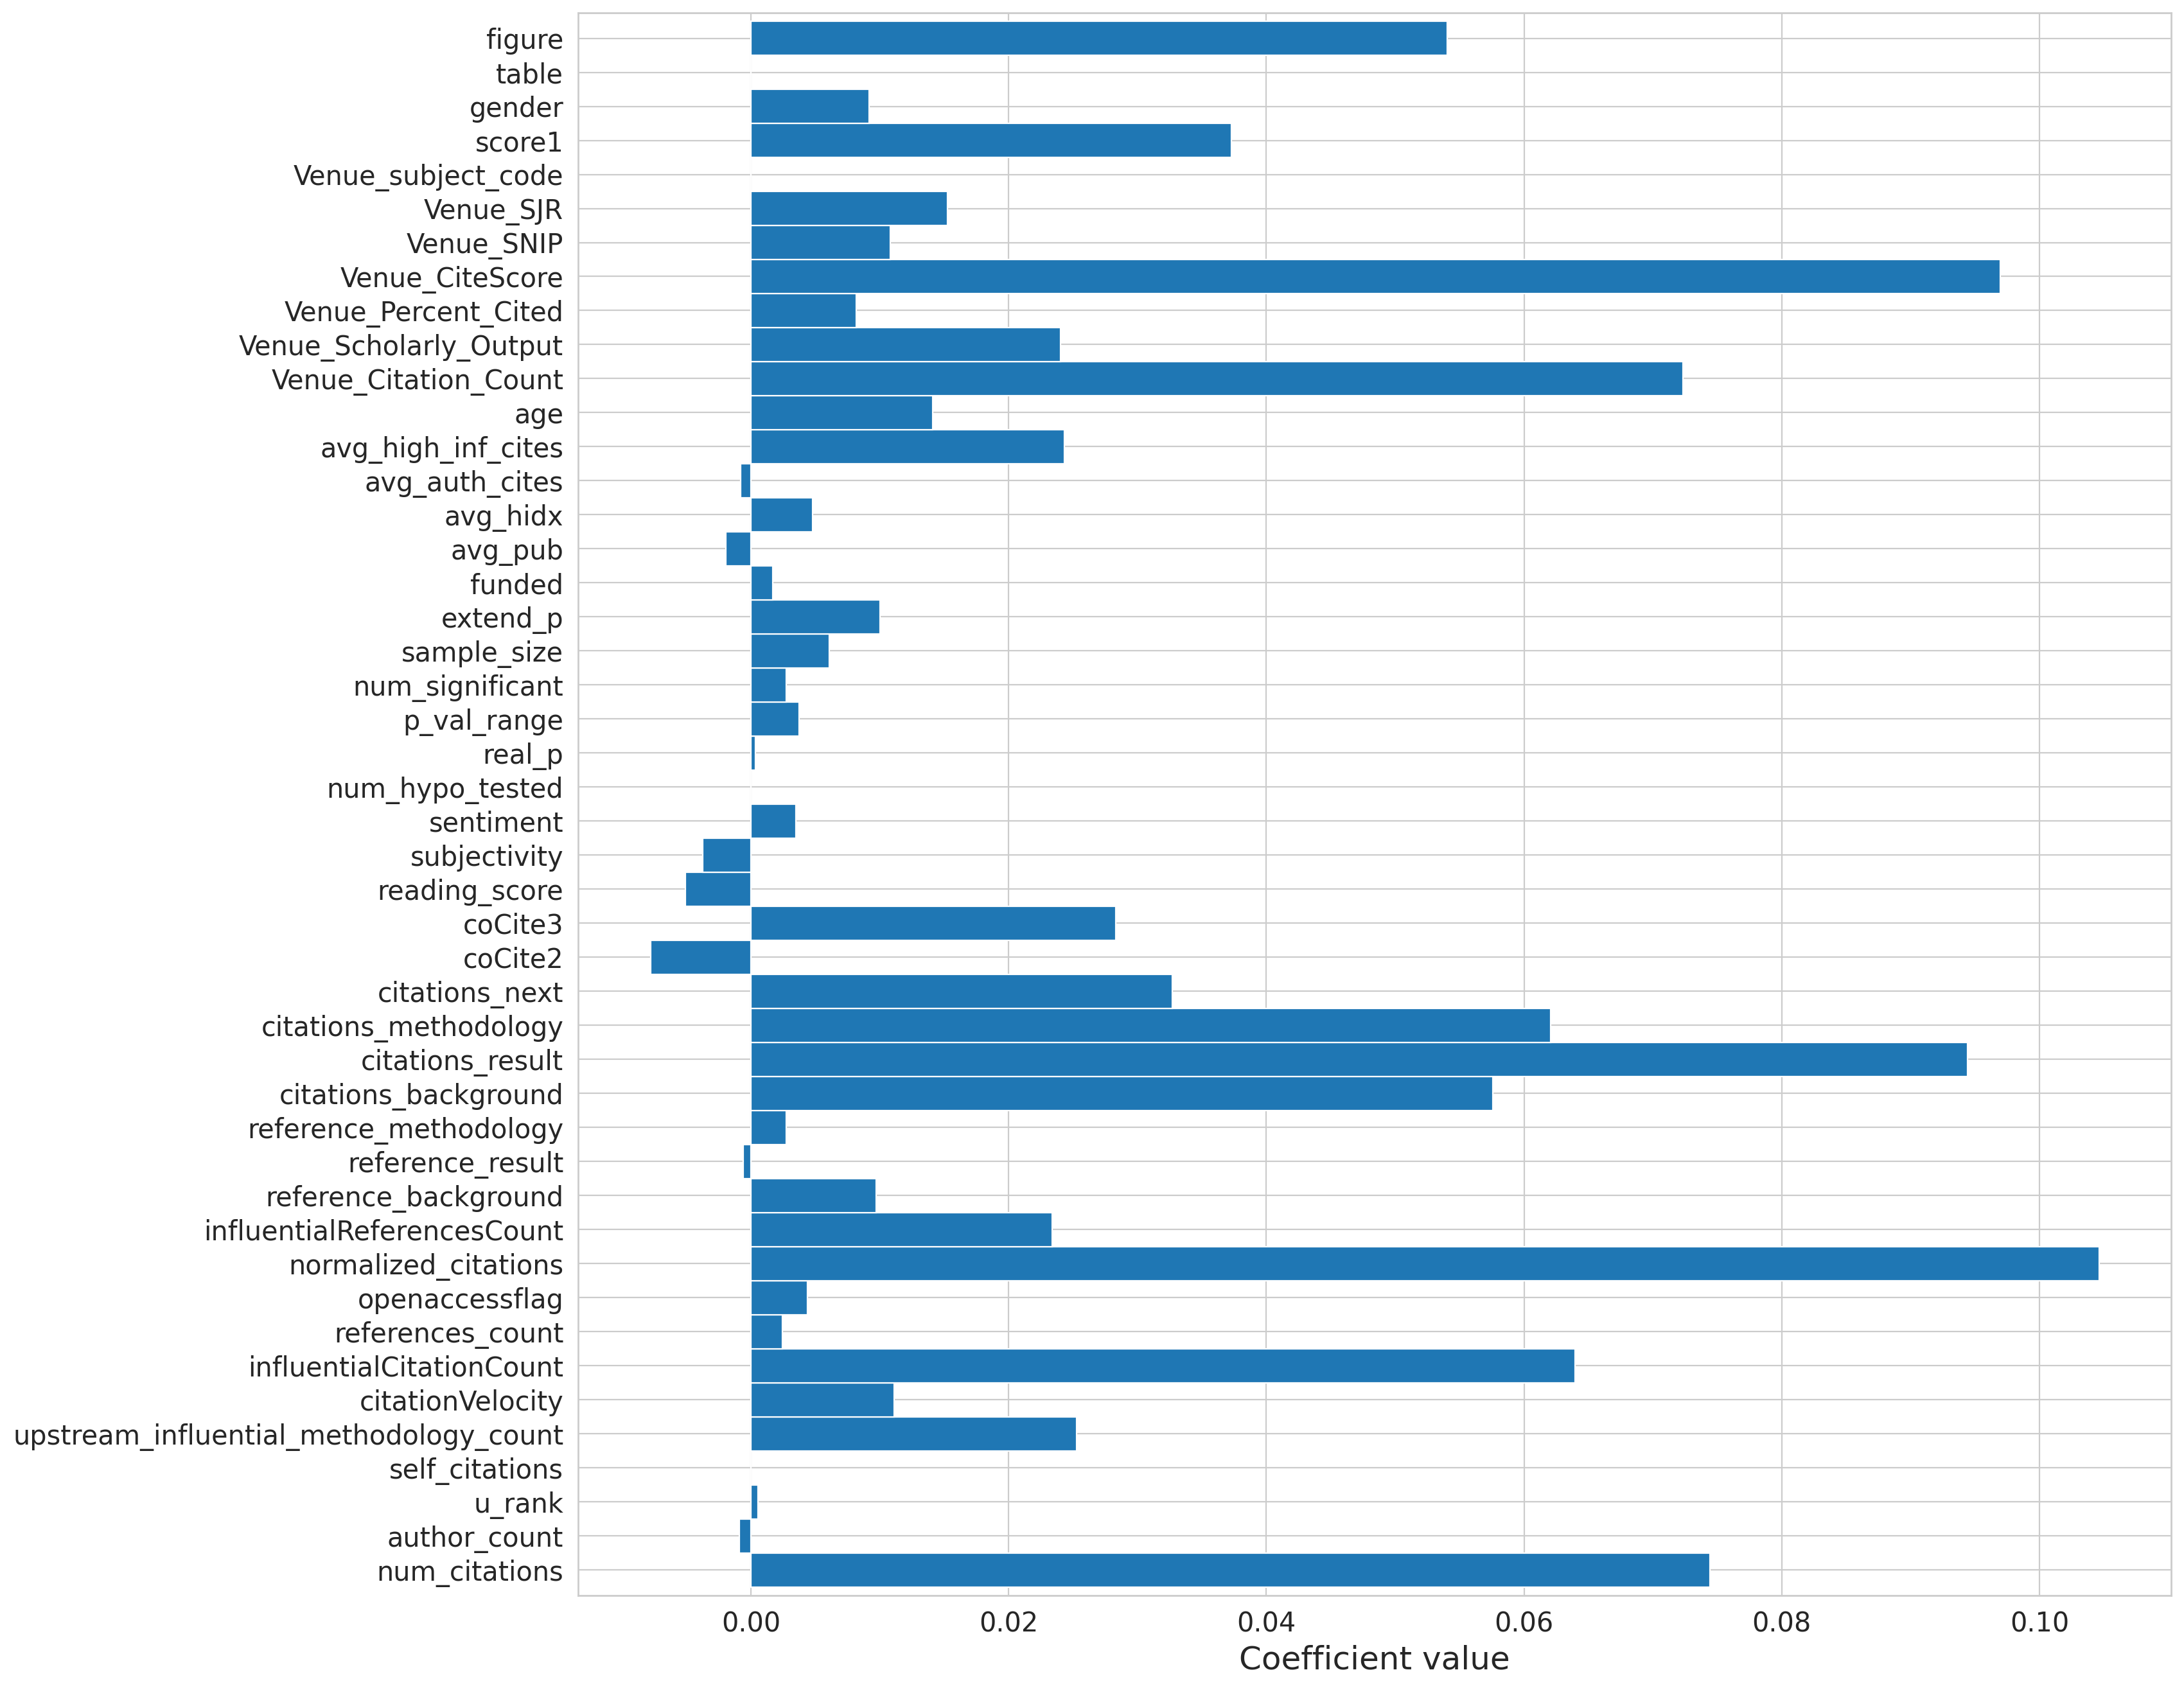

In [ ]:
p_score['p_score_mean'].plot(kind = 'barh', figsize=(16, 16), width =1)
plt.xlabel('Coefficient value', fontsize=18)
#plt.ylabel('Features', fontsize =18);

plt.savefig('Permutation_importance.png', dpi=350)

plt.show()

# SHAP feature importance analysis

In [ ]:
i = 5
X_obs = X_train.iloc[[i],:]
X_obs

num_citations  author_count  u_rank  self_citations  \
105             65             3     2.0        0.075472   

     upstream_influential_methodology_count  citationVelocity  \
105                                       4                11   

     influentialCitationCount  references_count  openaccessflag  \
105                         1                53               0   

     normalized_citations  ...  Venue_Scholarly_Output  Venue_Percent_Cited  \
105              9.285714  ...                   393.0                 81.0   

     Venue_CiteScore  Venue_SNIP  Venue_SJR  Venue_subject_code  score1  \
105              8.5       2.437      3.476                 1.0       0   

     gender  table  figure  
105     0.0      9       2  

[1 rows x 46 columns]

In [ ]:
X_train

num_citations  author_count    u_rank  self_citations  \
175             18             1  2.000000        0.000000   
198             73            10  2.000000        0.283019   
207            167             9  0.960396        0.023810   
82               8             4  2.000000        0.028571   
231             77             4  2.000000        0.266667   
..             ...           ...       ...             ...   
129             55             6  2.000000        0.175000   
23              42            15  2.000000        0.177215   
113           1683             3  0.960396        0.000000   
224            403             2  0.821782        0.081633   
125            671             4  2.000000        0.142857   

     upstream_influential_methodology_count  citationVelocity  \
175                                       0                 0   
198                                       3                 0   
207                                       0                18   
82                                        0                 0   
231                                       2                 7   
..                                      ...               ...   
129                                       2                 0   
23                                        1                 0   
113                                       0                93   
224                                       3                37   
125                                       3                68   

     influentialCitationCount  references_count  openaccessflag  \
175                         3                14               1   
198                         7                61               1   
207                        18                38               1   
82                          0                29               1   
231                         5                44               0   
..                        ...               ...             ...   
129                         7                36               0   
23                          6                83               0   
113                        75                33               0   
224                        47               197               1   
125                        38                40               1   

     normalized_citations  ...  Venue_Scholarly_Output  Venue_Percent_Cited  \
175              1.800000  ...              580.000000            83.000000   
198              5.214286  ...              409.311156            52.160947   
207             11.928571  ...              447.000000            88.000000   
82               0.727273  ...              473.000000            84.000000   
231              5.500000  ...              447.000000            88.000000   
..                    ...  ...                     ...                  ...   
129              3.055556  ...               87.000000            68.000000   
23               3.000000  ...              251.000000            82.000000   
113             93.500000  ...              504.000000            78.000000   
224             28.785714  ...              447.000000            88.000000   
125             41.937500  ...              580.000000            83.000000   

     Venue_CiteScore  Venue_SNIP  Venue_SJR  Venue_subject_code  score1  \
175        11.700000    3.537000    3.02000            1.000000       0   
198         3.242882    0.983931    0.66701            1.900272       3   
207        11.400000    3.813000    3.69700            1.000000       6   
82          7.400000    2.525000    2.28800            1.000000       3   
231        11.400000    3.813000    3.69700            1.000000       0   
..               ...         ...        ...                 ...     ...   
129         3.700000    0.981000    0.74100            1.000000       2   
23          9.100000    4.484000    8.24500            1.000000       0   
113         6.000000    1.946000    1.82500       

In [ ]:
# Let’s see how the model came up to the decision
# lime.lime_tabular module. This class is used for generating explanations for tabular (i.e., structured) data.
from lime.lime_tabular import LimeTabularExplainer
explainer = LimeTabularExplainer(training_data=X_train, feature_names=X_train.columns,class_names=['0', '1'], discretize_continuous=False,)
lime = explainer.explain_instance(X_obs.values[0], logR.predict_proba)#,num_features=10)
lime.show_in_notebook()

In [ ]:
# Importing and initialization java script for visualization from SHAP, we can use matplotlib as well!
import shap
shap.initjs() # jave script

In [ ]:
explainer_shap = shap.Explainer(model = logR, masker = X_train)
shap_values = explainer_shap.shap_values(X_test)

#  The SHAP values can be positive or negative, representing the direction and magnitude of the feature's effect.
# Positive values indicate that the feature positively contributes to increasing the prediction, while negative values indicate the opposite.
# The color of each bar represents the value of the feature. Darker colors indicate higher feature values, while lighter colors indicate lower feature values.
# This color encoding helps to visualize the distribution of feature values and their impact on predictions.
# The bars are sorted in descending order based on their mean absolute SHAP values.
# This arrangement allows for easy identification of the most influential features.

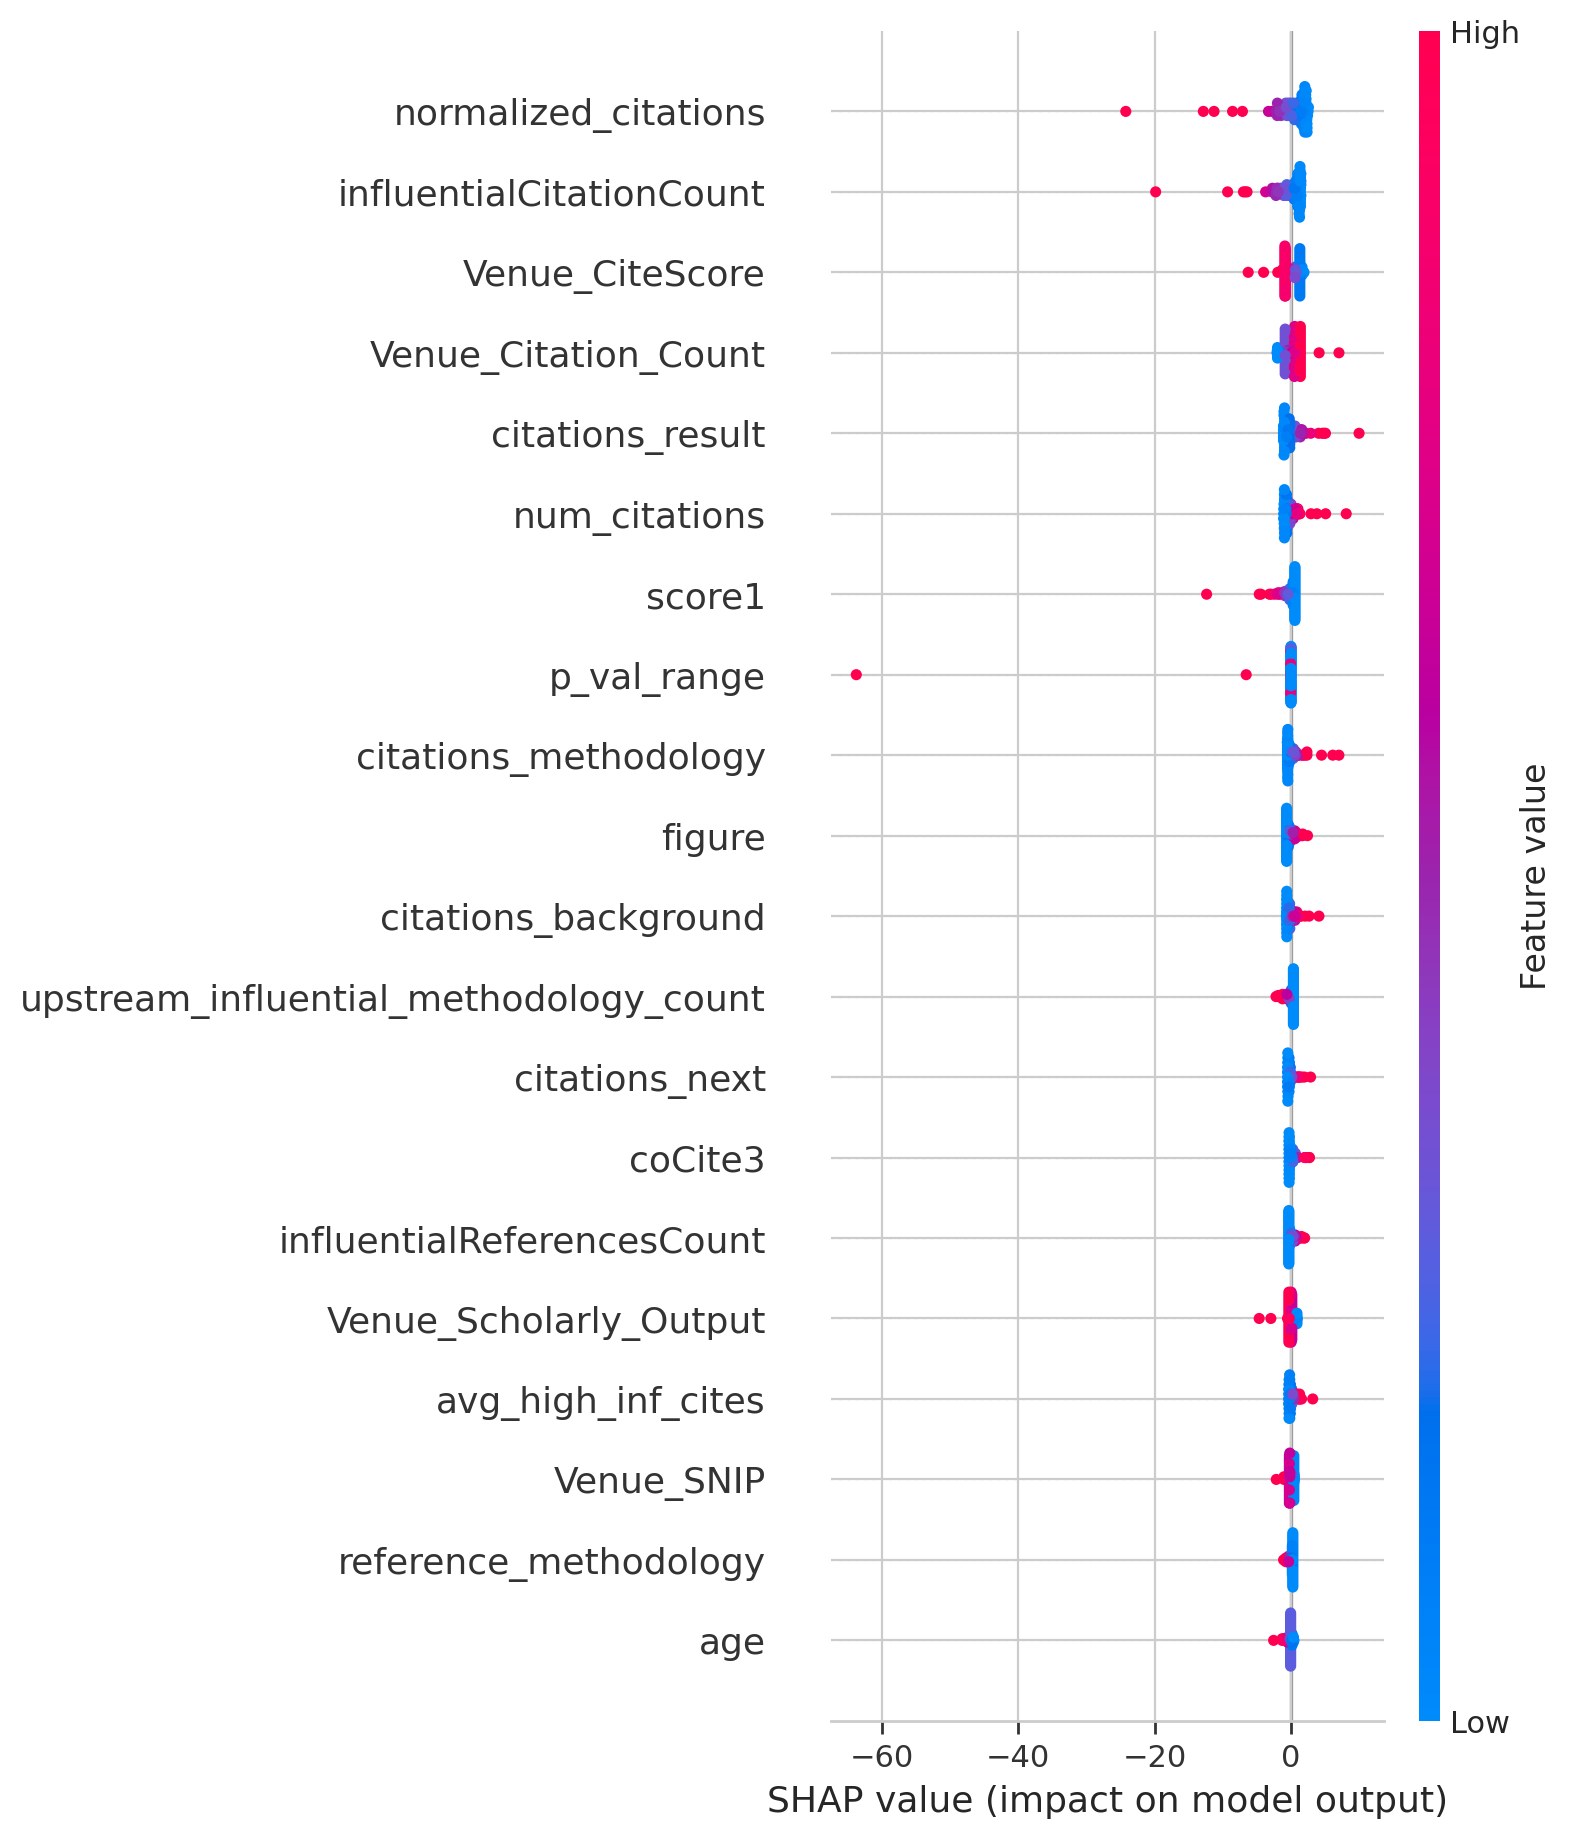

<Figure size 2070x1527 with 0 Axes>

In [ ]:
shap.summary_plot(shap_values, X_test)

plt.savefig('SHAP_impact_on_model.png', dpi=350)

plt.show()

In [ ]:
print("The base value is: ", explainer_shap.expected_value)

The base value is:  -0.8966754499111104


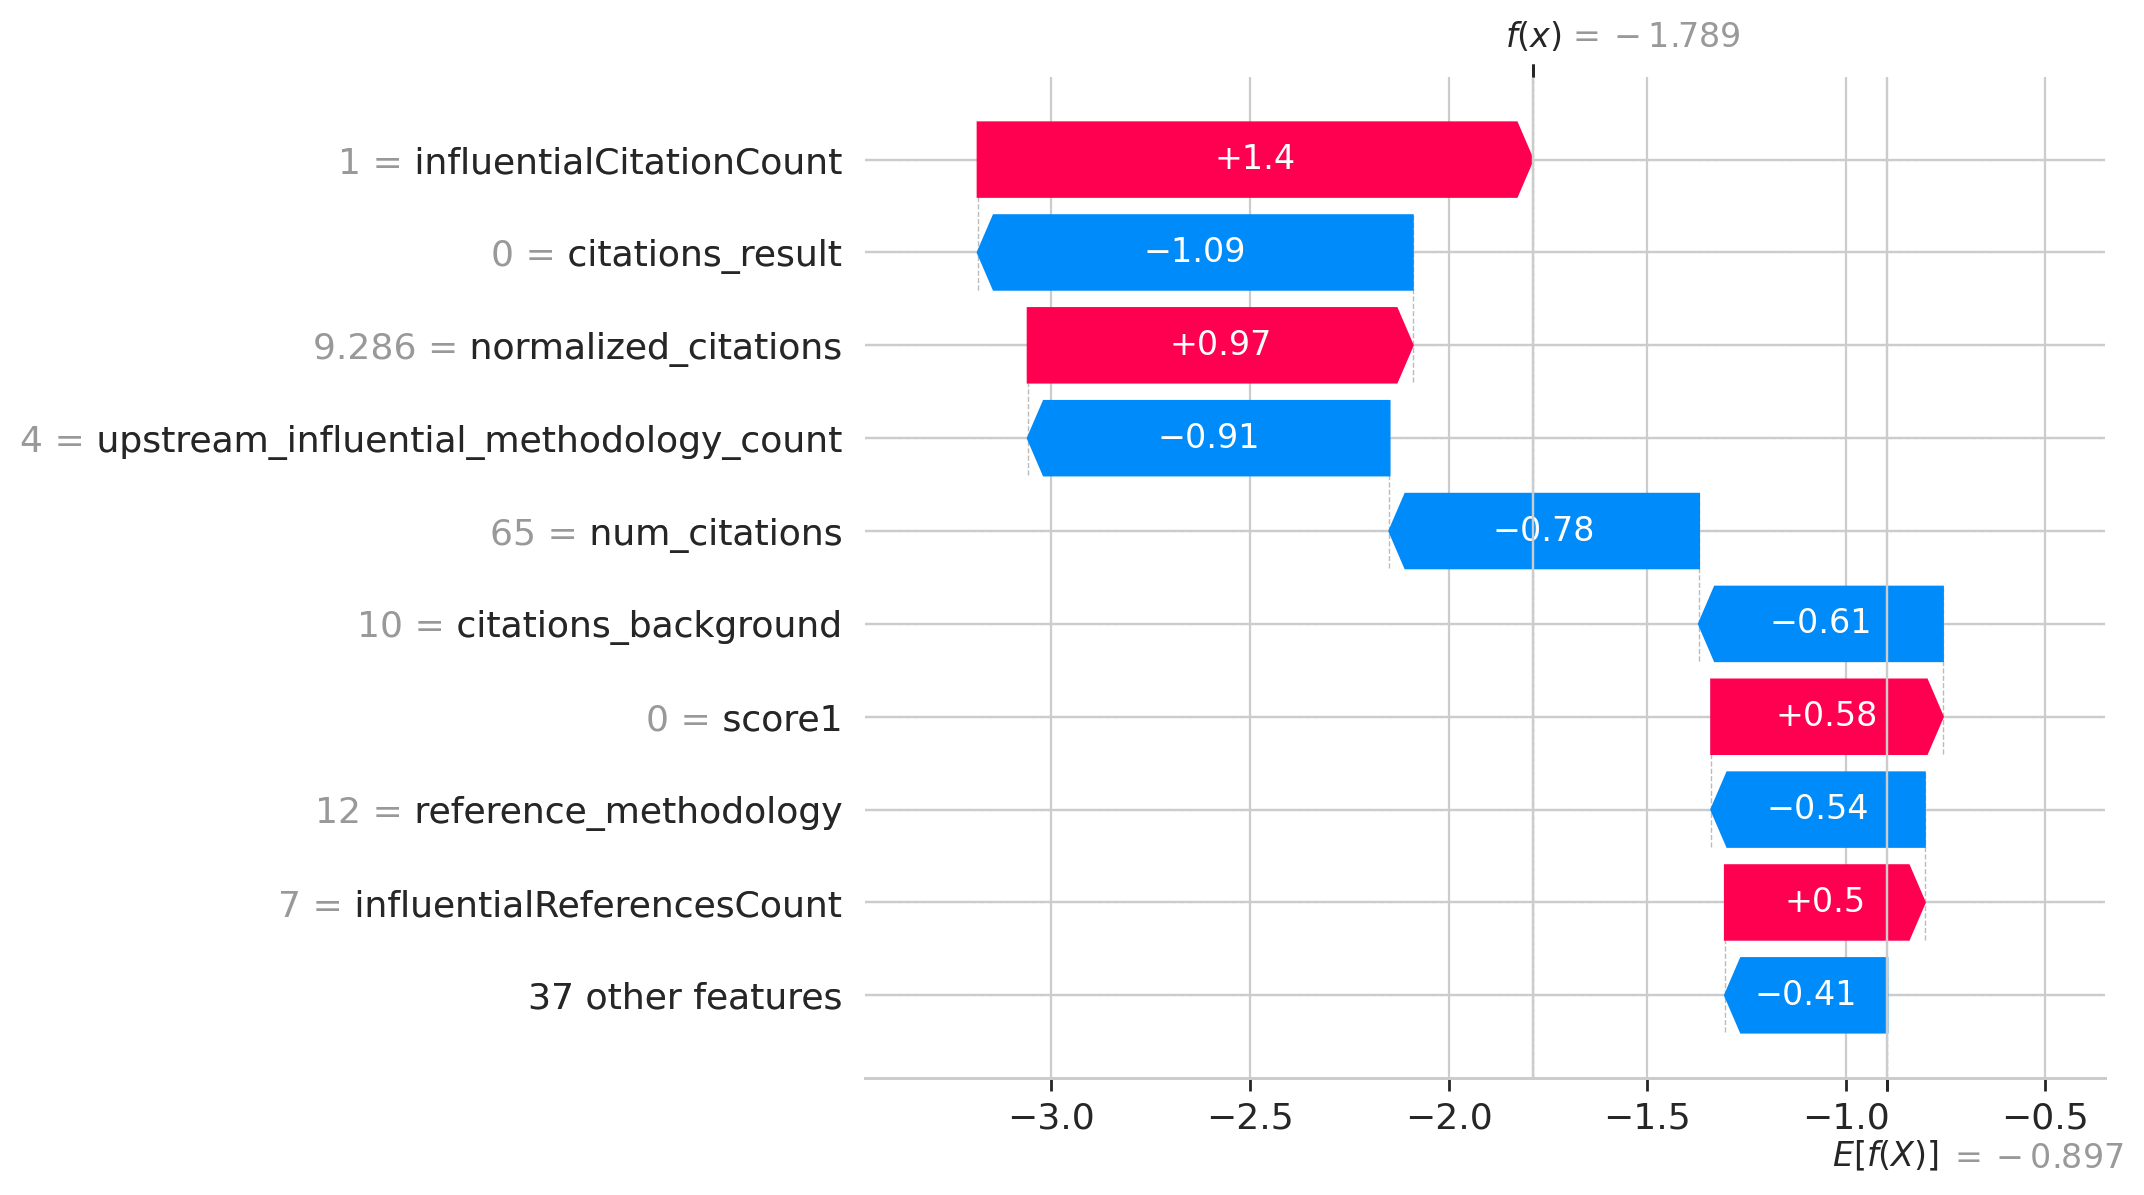

In [ ]:
explainer = shap.Explainer(model = logR, masker = X_train)
shap_values = explainer_shap.shap_values(X_test)

explanation_object = explainer(X_train)
shap_values = explainer.shap_values(X_train)
# visualize the first prediction's explanation
shap.plots.waterfall(explanation_object[5])

In [ ]:
shap.initjs()
shap.force_plot(base_value=explainer_shap.expected_value,
                shap_values=shap_values[i,:],
                features=X_train.iloc[i,:])

In [ ]:
shap.initjs()
shap.force_plot(base_value=explainer_shap.expected_value,shap_values=shap_values,features=X_train)